In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge , Lasso ,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.base import BaseEstimator, TransformerMixin , RegressorMixin,clone
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data=pd.read_csv("auto_mpg_dataset.csv",sep=",")

In [3]:
data.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin                   car_name   mpg  
0       1  chevrolet chevelle malibu  18.0  
1       1          buick skylark 320  15.0  
2       1         plymouth satellite  18.0  
3       1              amc rebel sst  16.0  
4       1                ford torino  17.0

In [4]:
data.tail()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     origin         car_name   mpg  
393       1  ford mustang gl  27.0  
394       2        vw pickup  44.0  
395       1    dodge rampage  32.0  
396       1      ford ranger  28.0  
397       1       chevy s-10  31.0

In [5]:
data.shape

(398, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [8]:
data.describe()

cylinders  displacement     horsepower       weight  acceleration  \
count  398.000000    398.000000     398.000000   398.000000    398.000000   
mean     5.454774    193.425879   -1404.643216  2970.424623     15.568090   
std      1.701004    104.269838   12213.424763   846.841774      2.757689   
min      3.000000     68.000000 -100000.000000  1613.000000      8.000000   
25%      4.000000    104.250000      75.000000  2223.750000     13.825000   
50%      4.000000    148.500000      92.000000  2803.500000     15.500000   
75%      8.000000    262.000000     125.000000  3608.000000     17.175000   
max      8.000000    455.000000     230.000000  5140.000000     24.800000   

       model_year      origin         mpg  
count  398.000000  398.000000  398.000000  
mean    76.010050    1.572864   23.514573  
std      3.697627    0.802055    7.815984  
min     70.000000    1.000000    9.000000  
25%     73.000000    1.000000   17.500000  
50%     76.000000    1.000000   23.000000  
75%     79.000000    2.000000   29.000000  
max     82.000000    3.000000   46.600000

<AxesSubplot:>

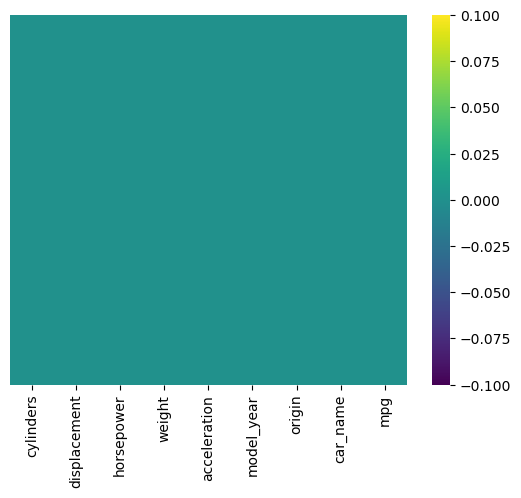

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [10]:
#columns of data
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'car_name', 'mpg'],
      dtype='object')

In [11]:
#checking for duplicated values
data.duplicated().sum()

0

In [12]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [13]:
data['model_year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

In [14]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [15]:
data["car_name"].nunique()

305

In [16]:
data["car_name"].value_counts().head(20)

ford pinto                   6
toyota corolla               5
amc matador                  5
ford maverick                5
chevrolet chevette           4
amc gremlin                  4
chevrolet impala             4
peugeot 504                  4
amc hornet                   4
toyota corona                4
ford gran torino             3
chevrolet caprice classic    3
honda civic                  3
volkswagen dasher            3
dodge colt                   3
chevrolet citation           3
chevrolet nova               3
pontiac catalina             3
plymouth fury iii            3
ford galaxie 500             3
Name: car_name, dtype: int64

In [17]:
data["car_name"].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

In [18]:
data['brand'] = data["car_name"].str.extract('(^.*?)\s')
#brands=data["brand"]
#brands=data["brand"].unique().astype('str')
#brands
data["brand"].value_counts()[:10]

ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: brand, dtype: int64

In [19]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand'] = data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes','mercedes-benz')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace('nissan','datsun')

In [20]:
#Checking for any null values in brand
data[data['brand'].isnull()]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
150          4         108.0        93.0  2391.0          15.5          74   
346          4          97.0        67.0  2065.0          17.8          81   

     origin car_name   mpg brand  
150       3   subaru  26.0   NaN  
346       3   subaru  32.3   NaN

In [21]:
data['brand'].fillna(value = 'subaru',inplace=True) 

In [22]:
data["brand"]=data["brand"].str.capitalize()

In [23]:
data.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin                   car_name   mpg      brand  
0       1  chevrolet chevelle malibu  18.0  Chevrolet  
1       1          buick skylark 320  15.0      Buick  
2       1         plymouth satellite  18.0   Plymouth  
3       1              amc rebel sst  16.0        Amc  
4       1                ford torino  17.0       Ford

In [24]:
def country(x):
    if x==1:
        return "USA"
    elif x==2:
        return "Europe"
    elif x==3:
        return "Japan"

In [25]:
data["origin"]=data["origin"].apply(country)

In [26]:
data.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

  origin                   car_name   mpg      brand  
0    USA  chevrolet chevelle malibu  18.0  Chevrolet  
1    USA          buick skylark 320  15.0      Buick  
2    USA         plymouth satellite  18.0   Plymouth  
3    USA              amc rebel sst  16.0        Amc  
4    USA                ford torino  17.0       Ford

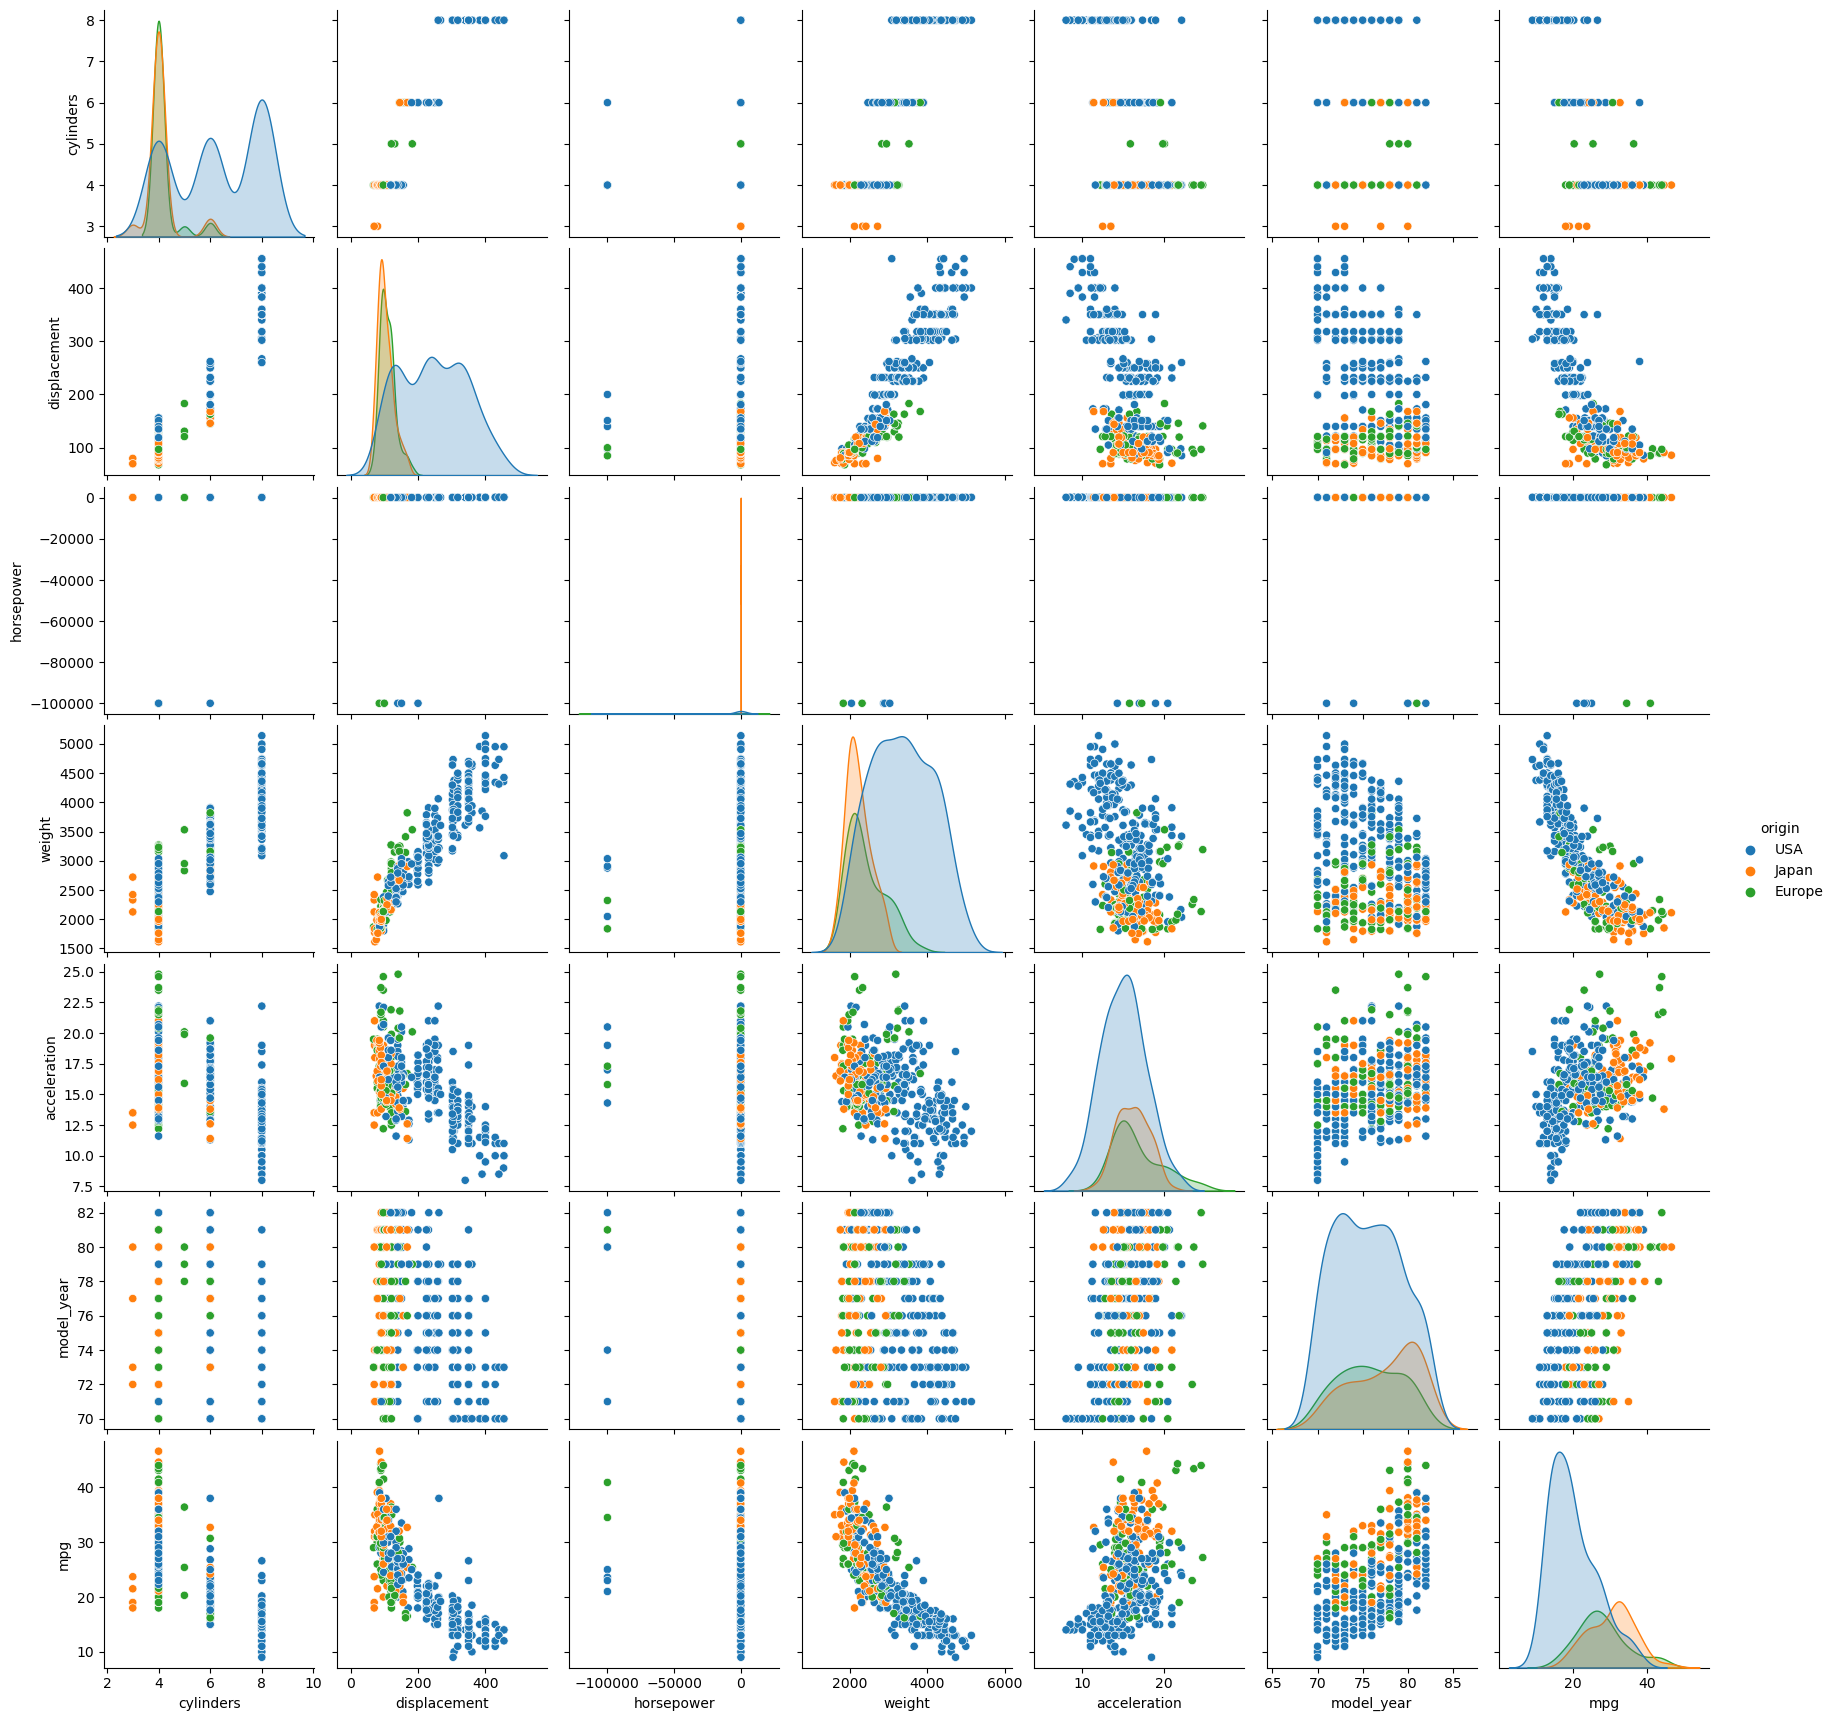

In [27]:
sns.pairplot(data,hue="origin")

<AxesSubplot:>

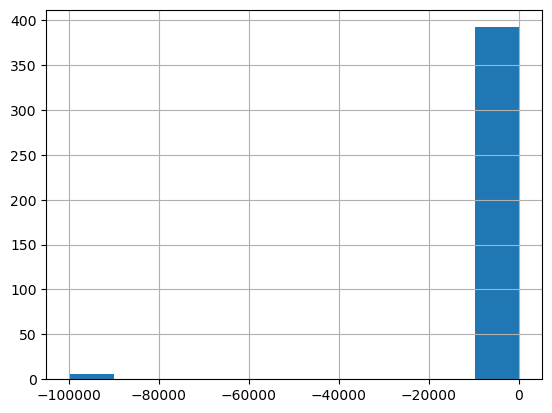

In [28]:
#Distribution of horsepower for all cars
data["horsepower"].hist()

In [29]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(data["horsepower"].min(),data.horsepower.max()))

minimum value: -100000.0 
maximum value : 230.0


In [30]:
data[data["horsepower"]<=0]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
32           4          98.0   -100000.0  2046.0          19.0          71   
126          6         200.0   -100000.0  2875.0          17.0          74   
330          4          85.0   -100000.0  1835.0          17.3          80   
336          4         140.0   -100000.0  2905.0          14.3          80   
354          4         100.0   -100000.0  2320.0          15.8          81   
374          4         151.0   -100000.0  3035.0          20.5          82   

     origin              car_name   mpg    brand  
32      USA            ford pinto  25.0     Ford  
126     USA         ford maverick  21.0     Ford  
330  Europe  renault lecar deluxe  40.9  Renault  
336     USA    ford mustang cobra  23.6     Ford  
354  Europe           renault 18i  34.5  Renault  
374     USA        amc concord dl  23.0      Amc

In [31]:
data[data["car_name"]=="ford pinto"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
32           4          98.0   -100000.0  2046.0          19.0          71   
112          4         122.0        85.0  2310.0          18.5          73   
130          4         122.0        80.0  2451.0          16.5          74   
168          4         140.0        83.0  2639.0          17.0          75   
174          6         171.0        97.0  2984.0          14.5          75   
206          4         140.0        72.0  2565.0          13.6          76   

    origin    car_name   mpg brand  
32     USA  ford pinto  25.0  Ford  
112    USA  ford pinto  19.0  Ford  
130    USA  ford pinto  26.0  Ford  
168    USA  ford pinto  23.0  Ford  
174    USA  ford pinto  18.0  Ford  
206    USA  ford pinto  26.5  Ford

In [32]:
data[data["car_name"]=="ford pinto"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
32           4          98.0   -100000.0  2046.0          19.0          71   
112          4         122.0        85.0  2310.0          18.5          73   
130          4         122.0        80.0  2451.0          16.5          74   
168          4         140.0        83.0  2639.0          17.0          75   
174          6         171.0        97.0  2984.0          14.5          75   
206          4         140.0        72.0  2565.0          13.6          76   

    origin    car_name   mpg brand  
32     USA  ford pinto  25.0  Ford  
112    USA  ford pinto  19.0  Ford  
130    USA  ford pinto  26.0  Ford  
168    USA  ford pinto  23.0  Ford  
174    USA  ford pinto  18.0  Ford  
206    USA  ford pinto  26.5  Ford

In [33]:
data[data["car_name"]=="renault 18i"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
354          4         100.0   -100000.0  2320.0          15.8          81   

     origin     car_name   mpg    brand  
354  Europe  renault 18i  34.5  Renault

In [34]:
data[data["brand"]=="Renault"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
79           4          96.0        69.0  2189.0          18.0          72   
186          4         101.0        83.0  2202.0          15.3          76   
218          4          79.0        58.0  1825.0          18.6          77   
330          4          85.0   -100000.0  1835.0          17.3          80   
354          4         100.0   -100000.0  2320.0          15.8          81   

     origin              car_name   mpg    brand  
79   Europe       renault 12 (sw)  26.0  Renault  
186  Europe          renault 12tl  27.0  Renault  
218  Europe         renault 5 gtl  36.0  Renault  
330  Europe  renault lecar deluxe  40.9  Renault  
354  Europe           renault 18i  34.5  Renault

In [35]:
cars=data[data["horsepower"]<=0]["car_name"].unique()
cars

array(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype=object)

In [36]:
for car in cars:
    med=0
    brand=data[data["car_name"]==cars[3]]["brand"].values
    med=data.loc[(data["car_name"]==car) & (data["horsepower"]>0),"horsepower"].median()
   
    data.loc[(data["car_name"]==car) & (data["horsepower"]<=0),"horsepower"]=np.nan
    data.fillna(med,inplace=True)
    med_brand=data.loc[(data["brand"]==brand[0]) & (data["horsepower"]>0),"horsepower"].median()
    data.fillna(med_brand,inplace=True)

In [37]:
data[data["car_name"]=="ford maverick"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
17           6         200.0        85.0  2587.0          16.0          70   
100          6         250.0        88.0  3021.0          16.5          73   
126          6         200.0        83.0  2875.0          17.0          74   
155          6         250.0        72.0  3158.0          19.5          75   
193          6         200.0        81.0  3012.0          17.6          76   

    origin       car_name   mpg brand  
17     USA  ford maverick  21.0  Ford  
100    USA  ford maverick  18.0  Ford  
126    USA  ford maverick  21.0  Ford  
155    USA  ford maverick  15.0  Ford  
193    USA  ford maverick  24.0  Ford

In [38]:
data[data["horsepower"]<=0]
#All outliers have been either filled with their car_name's median value 

Empty DataFrame
Columns: [cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name, mpg, brand]
Index: []

In [39]:
#or if the car_name has only single row then it has been filled with the their Brand's median value
data[data["car_name"]=="renault 18i"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
354          4         100.0        89.0  2320.0          15.8          81   

     origin     car_name   mpg    brand  
354  Europe  renault 18i  34.5  Renault

In [40]:
data[data["brand"]=="Renault"]

cylinders  displacement  horsepower  weight  acceleration  model_year  \
79           4          96.0        69.0  2189.0          18.0          72   
186          4         101.0        83.0  2202.0          15.3          76   
218          4          79.0        58.0  1825.0          18.6          77   
330          4          85.0        89.0  1835.0          17.3          80   
354          4         100.0        89.0  2320.0          15.8          81   

     origin              car_name   mpg    brand  
79   Europe       renault 12 (sw)  26.0  Renault  
186  Europe          renault 12tl  27.0  Renault  
218  Europe         renault 5 gtl  36.0  Renault  
330  Europe  renault lecar deluxe  40.9  Renault  
354  Europe           renault 18i  34.5  Renault

<AxesSubplot:>

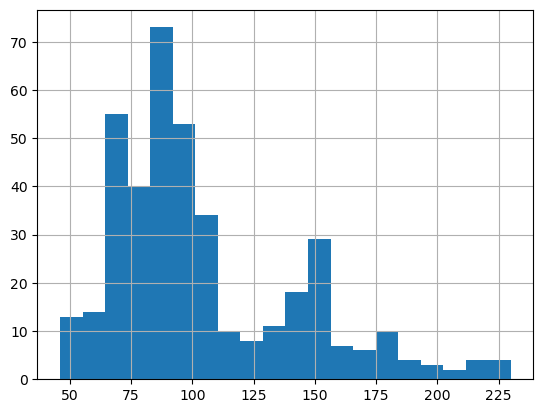

In [41]:
data["horsepower"].hist(bins=20)

In [42]:
plt.figure(figsize=(20,8))
brands_USA=data[data["origin"]=="USA"]["brand"]
brands_Europe=data[data["origin"]=="Europe"]["brand"]
brands_Japan=data[data["origin"]=="Japan"]["brand"]
brand_origin=pd.DataFrame([["USA",brands_USA.nunique()],["Europe",brands_Europe.nunique()],["Japan",brands_Japan.nunique()]],
                          columns=["Origin Country","Total no. of brands"])
brand_origin

Origin Country  Total no. of brands
0            USA                   12
1         Europe                   11
2          Japan                    5

<Figure size 2000x800 with 0 Axes>

<AxesSubplot:>

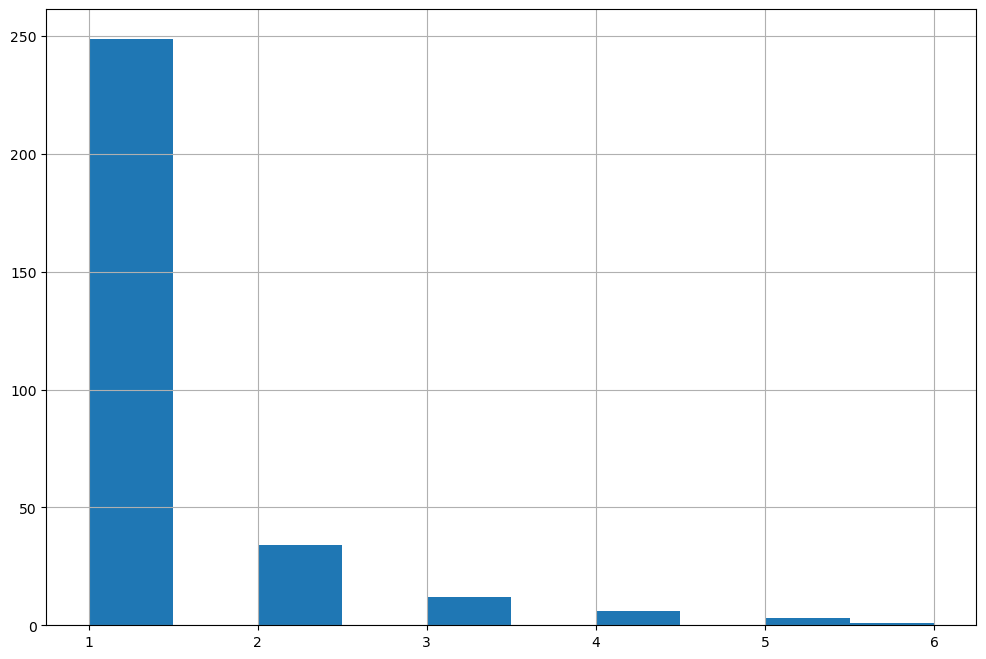

In [43]:

plt.figure(figsize=(12,8))
data["car_name"].value_counts().hist()

In [44]:
data["car_name"].nunique()

305

In [45]:
data.drop("car_name",axis=1,inplace=True)

In [46]:
data.corr()

cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950721    0.841842  0.896017     -0.505419   
displacement   0.950721      1.000000    0.896334  0.932824     -0.543684   
horsepower     0.841842      0.896334    1.000000  0.863053     -0.687740   
weight         0.896017      0.932824    0.863053  1.000000     -0.417457   
acceleration  -0.505419     -0.543684   -0.687740 -0.417457      1.000000   
model_year    -0.348746     -0.370164   -0.413533 -0.306564      0.288137   
mpg           -0.775396     -0.804203   -0.773662 -0.831741      0.420289   

              model_year       mpg  
cylinders      -0.348746 -0.775396  
displacement   -0.370164 -0.804203  
horsepower     -0.413533 -0.773662  
weight         -0.306564 -0.831741  
acceleration    0.288137  0.420289  
model_year      1.000000  0.579267  
mpg             0.579267  1.000000

In [47]:
#Setting palette
sns.set_palette("bright")

In [48]:
data.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

  origin   mpg      brand  
0    USA  18.0  Chevrolet  
1    USA  15.0      Buick  
2    USA  18.0   Plymouth  
3    USA  16.0        Amc  
4    USA  17.0       Ford

<AxesSubplot:title={'center':'Number of cars according to Origin'}, xlabel='origin', ylabel='count'>

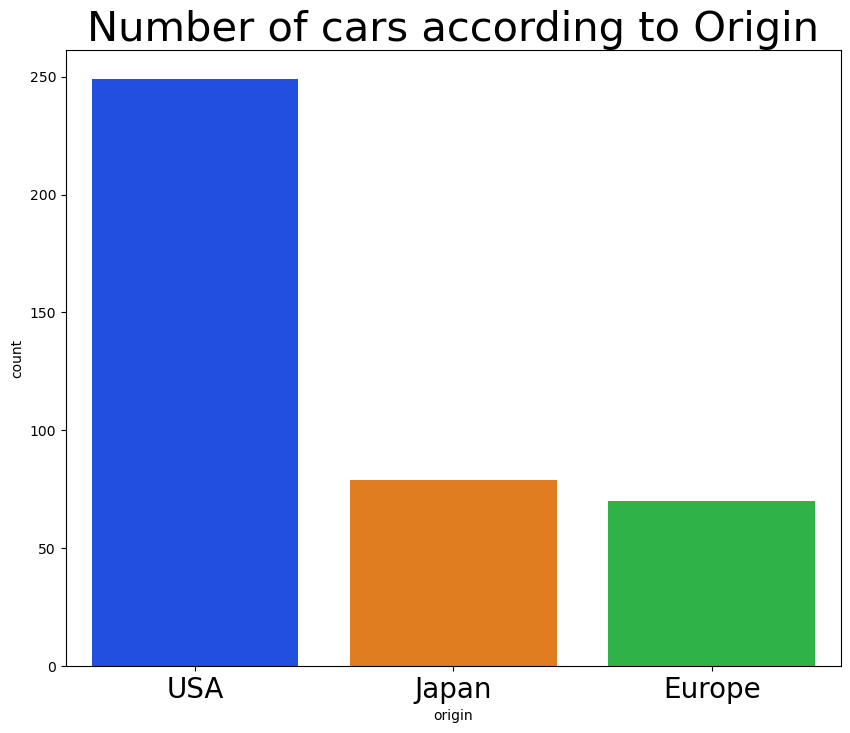

In [49]:

plt.figure(figsize=(10,8))
plt.title("Number of cars according to Origin",fontsize=30)
plt.xticks(fontsize=20)
sns.countplot(data["origin"])

<AxesSubplot:title={'center':'Number of cars according to Total no. of Cylinders present'}, xlabel='cylinders', ylabel='count'>

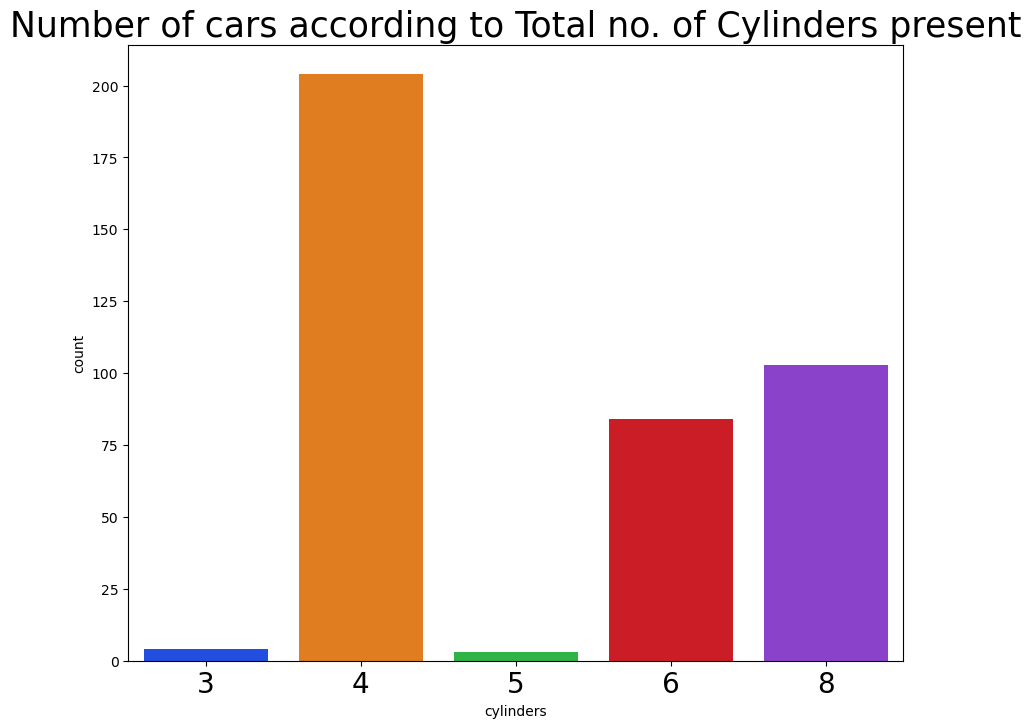

In [50]:
plt.figure(figsize=(10,8))
plt.title("Number of cars according to Total no. of Cylinders present",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(data["cylinders"])

<AxesSubplot:title={'center':'Total number of cars according to Number of Cylinders in each Origin'}, xlabel='cylinders', ylabel='count'>

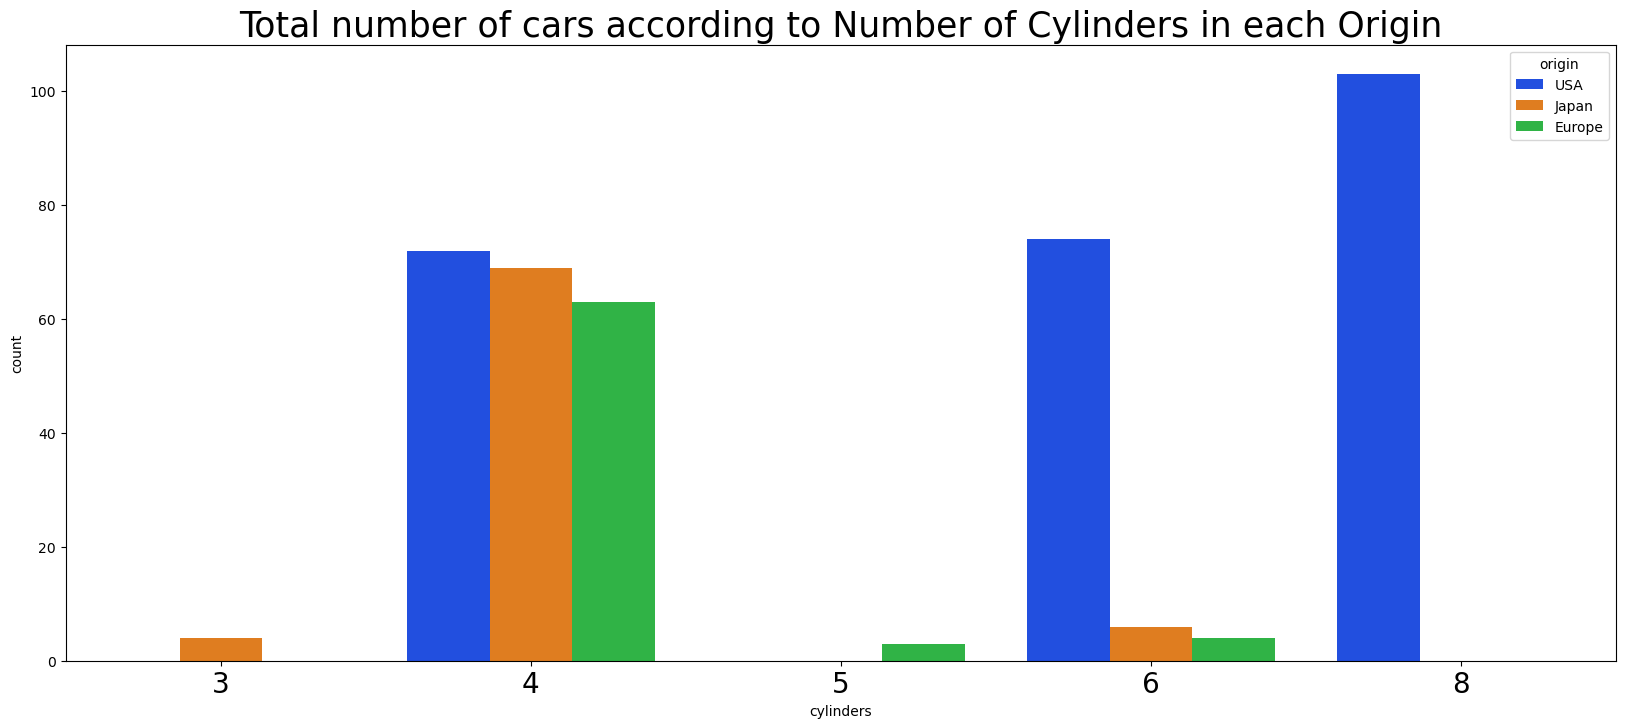

In [51]:
plt.figure(figsize=(20,8))
plt.title("Total number of cars according to Number of Cylinders in each Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(x="cylinders",data=data,hue="origin")

<AxesSubplot:title={'center':'Total number of cars according to Model year'}, xlabel='model_year', ylabel='count'>

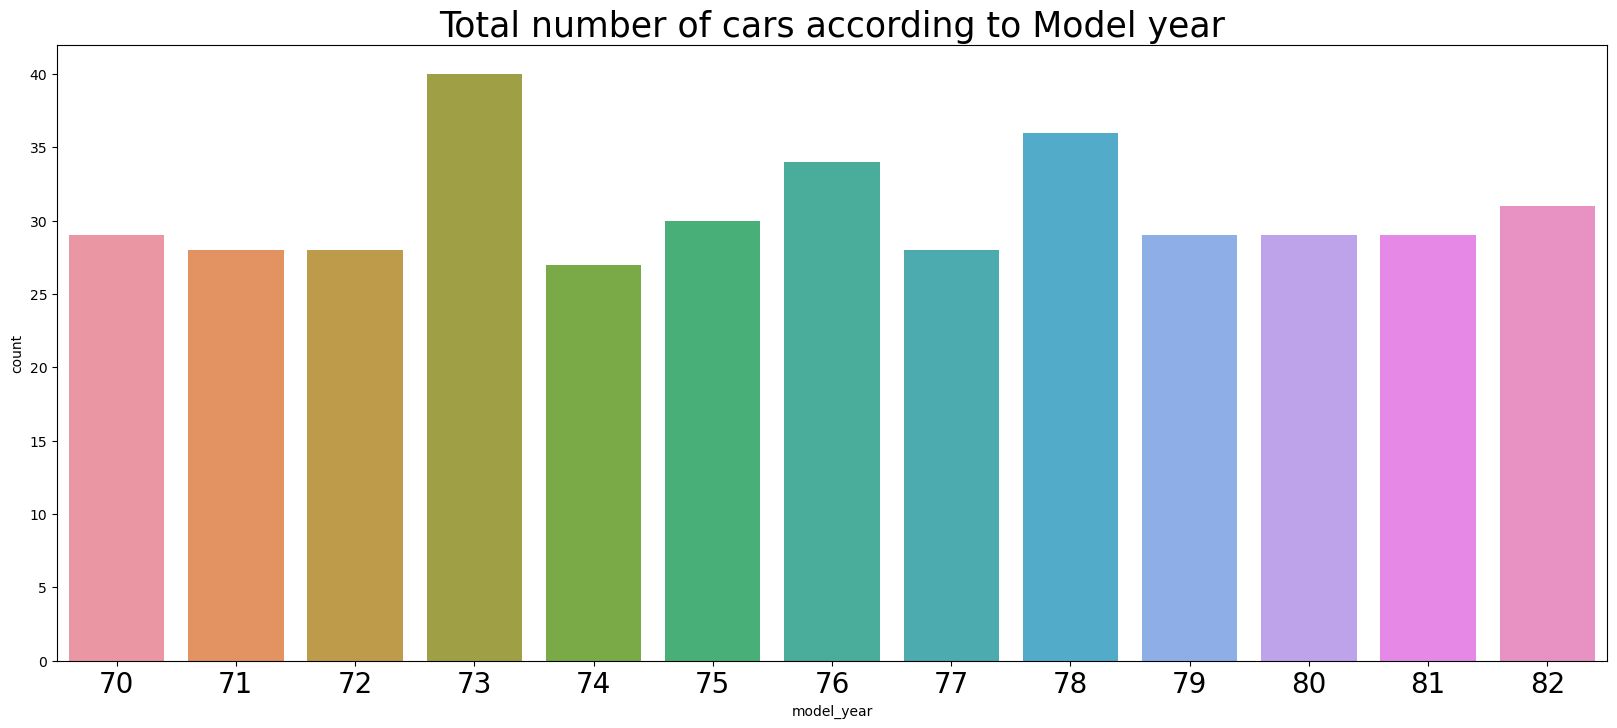

In [52]:
plt.figure(figsize=(20,8))
plt.title("Total number of cars according to Model year",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(data["model_year"])

<AxesSubplot:title={'center':'Total number of cars according to Brand'}, xlabel='brand', ylabel='count'>

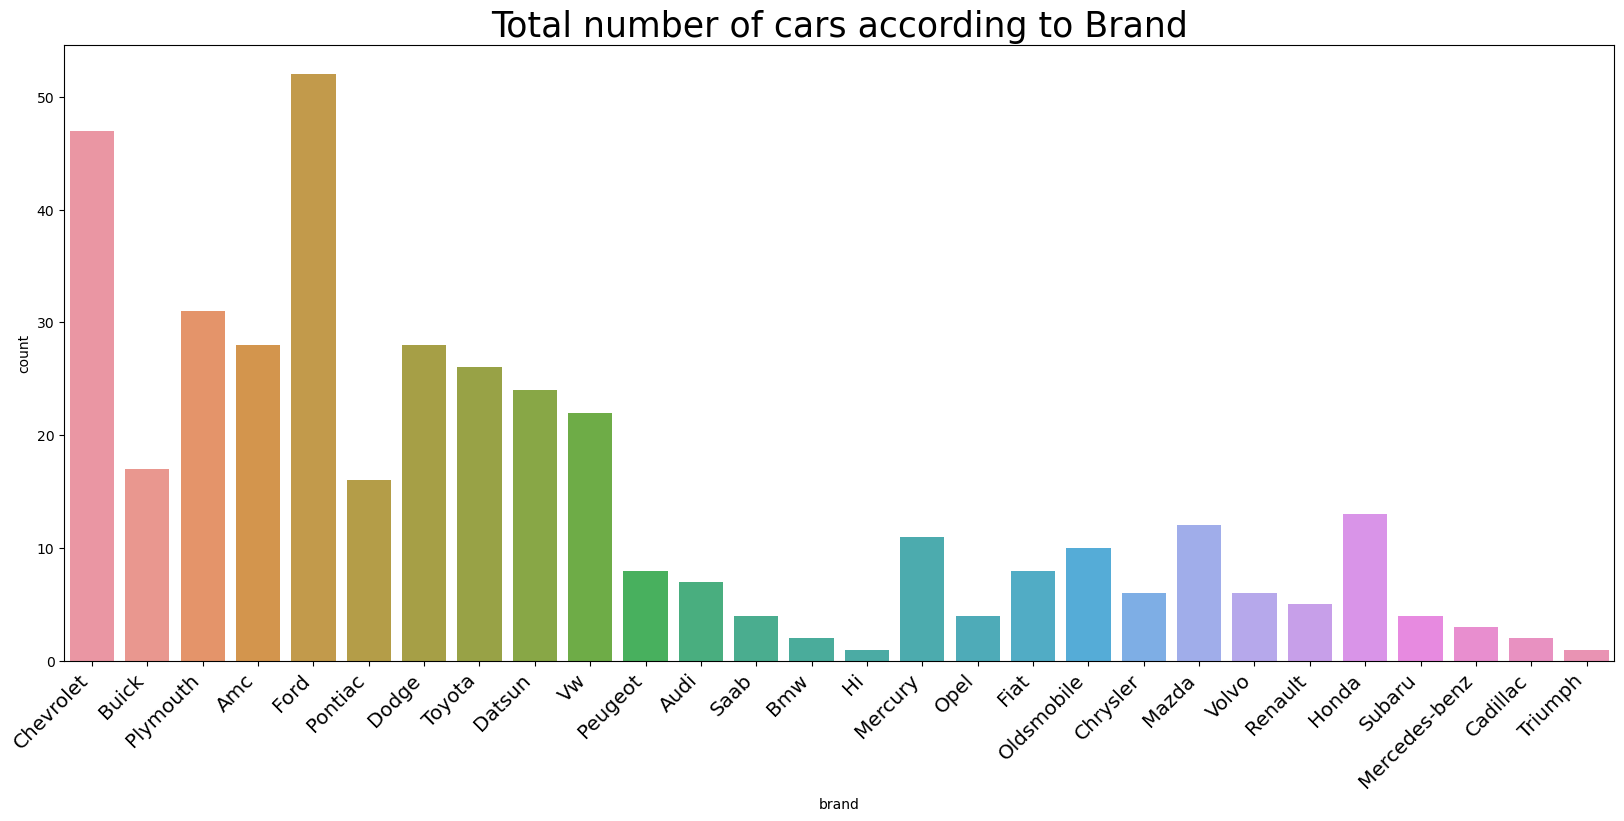

In [53]:
plt.figure(figsize=(20,8))
plt.title("Total number of cars according to Brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')

sns.countplot(data["brand"])

<AxesSubplot:title={'center':'Total number of brands from each Origin'}, xlabel='Origin Country', ylabel='Total no. of brands'>

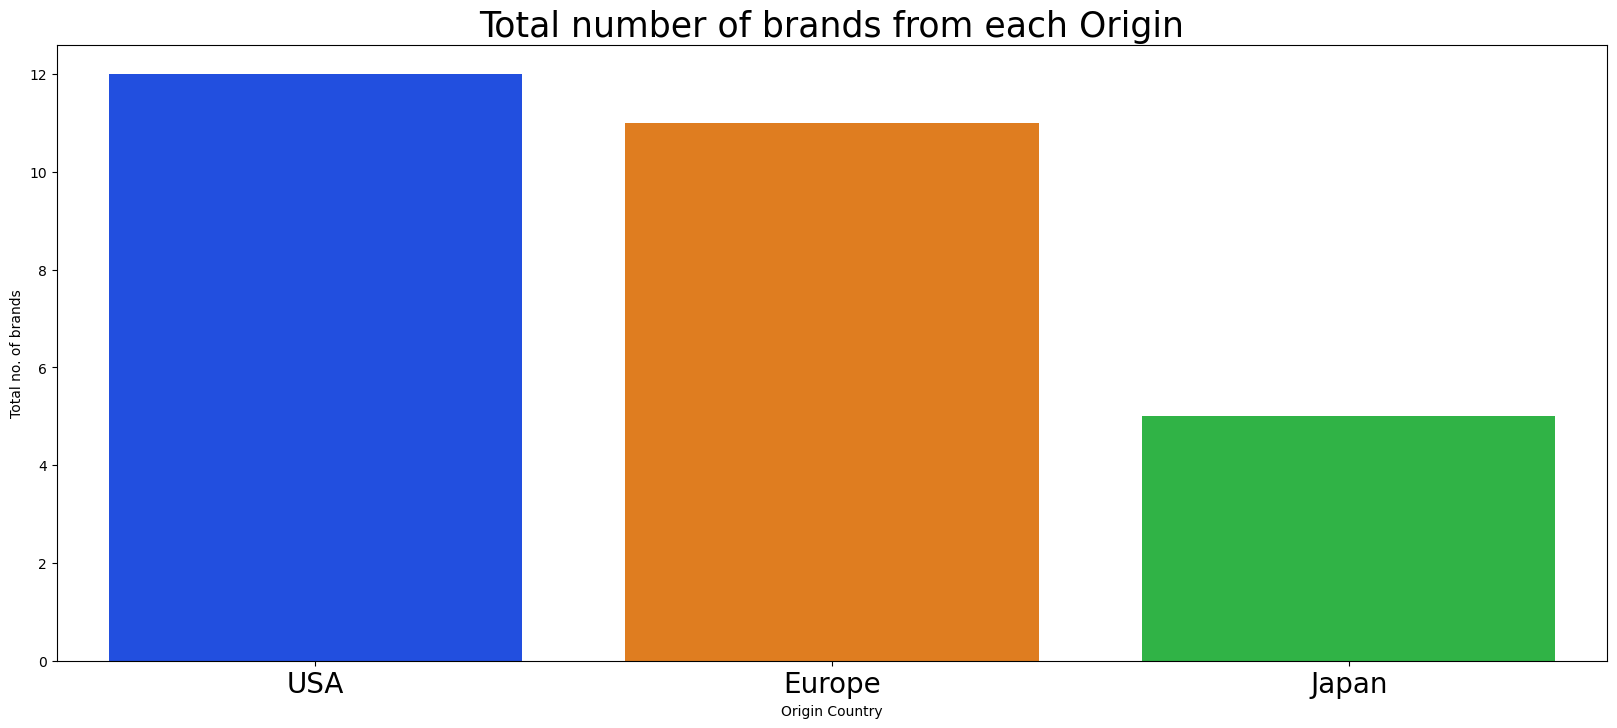

In [54]:

plt.figure(figsize=(20,8))
plt.title("Total number of brands from each Origin",fontsize=25)
plt.xticks(fontsize=20)

sns.barplot(data=brand_origin ,x="Origin Country",y="Total no. of brands")

<AxesSubplot:title={'center':'Number of cars according to brand in Top 20 cars with highest mpg'}, xlabel='brand', ylabel='count'>

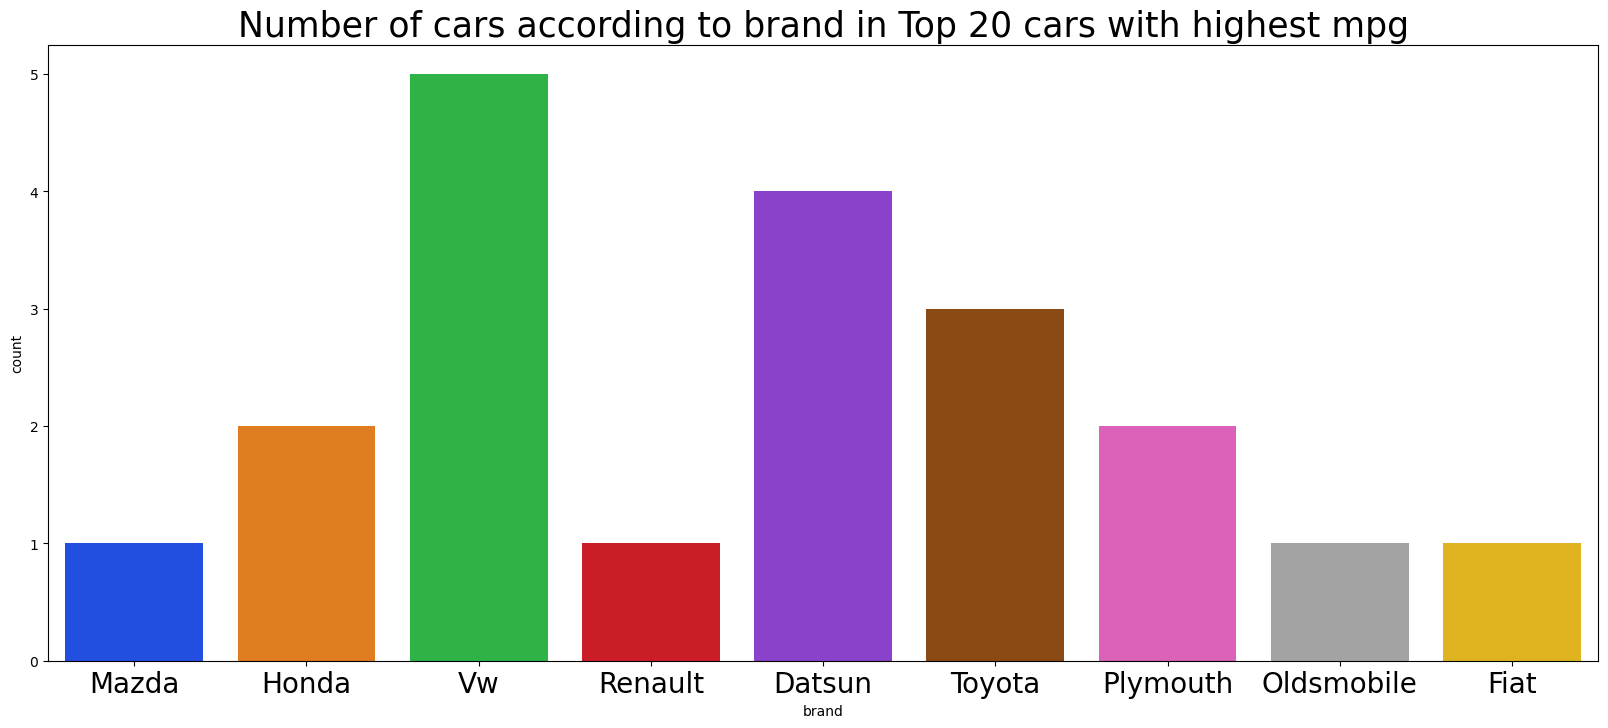

In [55]:
plt.figure(figsize=(20,8))
plt.title("Number of cars according to brand in Top 20 cars with highest mpg",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(data.sort_values(by="mpg",ascending=False)["brand"][:20])

<AxesSubplot:title={'center':'MPG values according to Number of Cylinders'}, xlabel='cylinders', ylabel='mpg'>

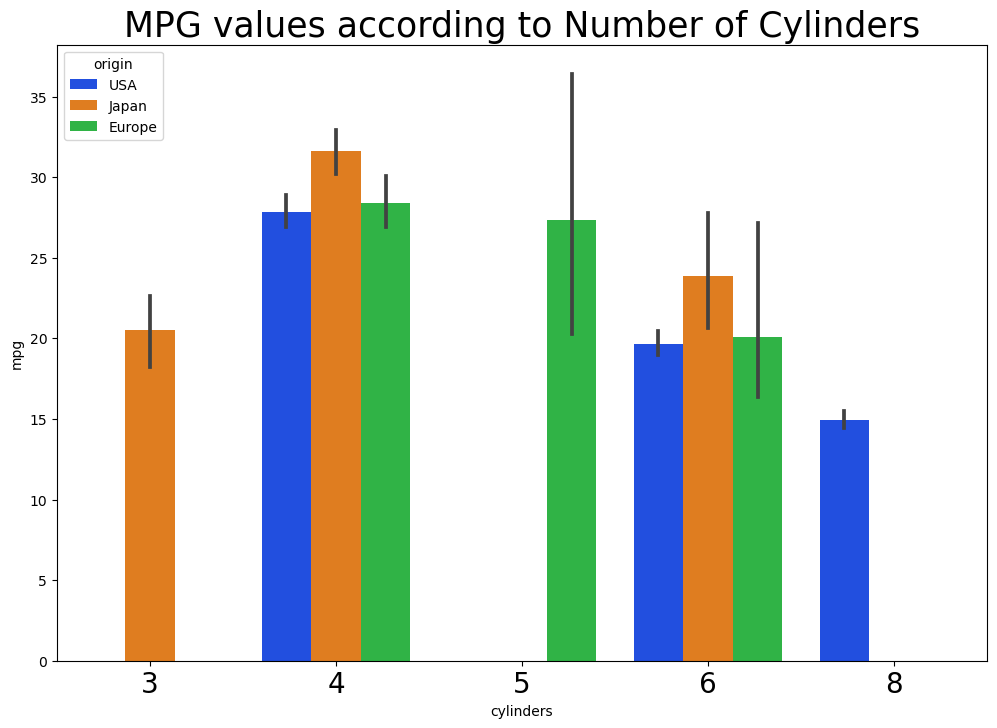

In [56]:

plt.figure(figsize=(12,8))
plt.title("MPG values according to Number of Cylinders",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="cylinders",y="mpg",data=data,hue="origin")

<AxesSubplot:title={'center':'MPG values according to Model year'}, xlabel='model_year', ylabel='mpg'>

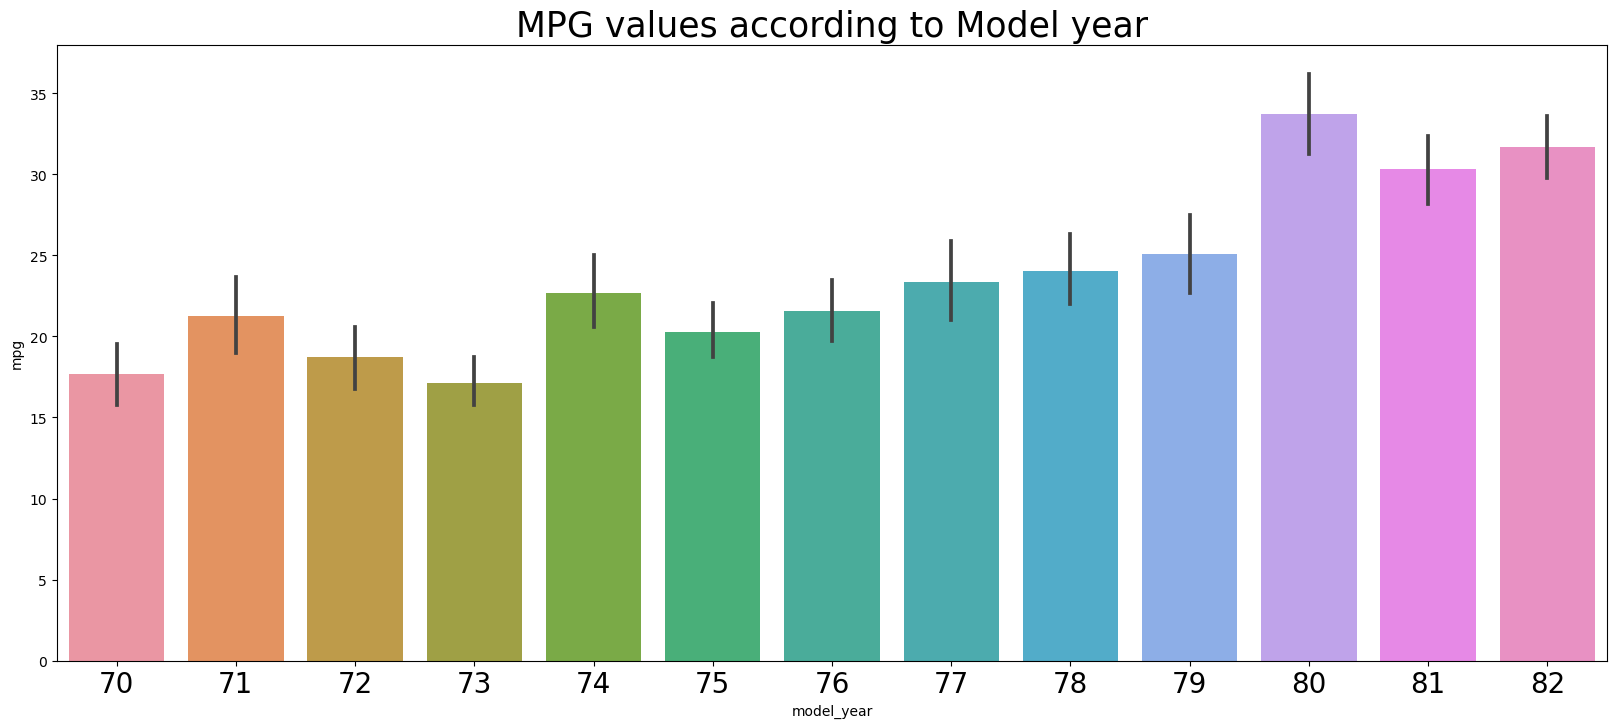

In [57]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Model year",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(y="mpg",x="model_year",data=data)

<AxesSubplot:title={'center':'MPG values according to Model year from each Origin'}, xlabel='model_year', ylabel='mpg'>

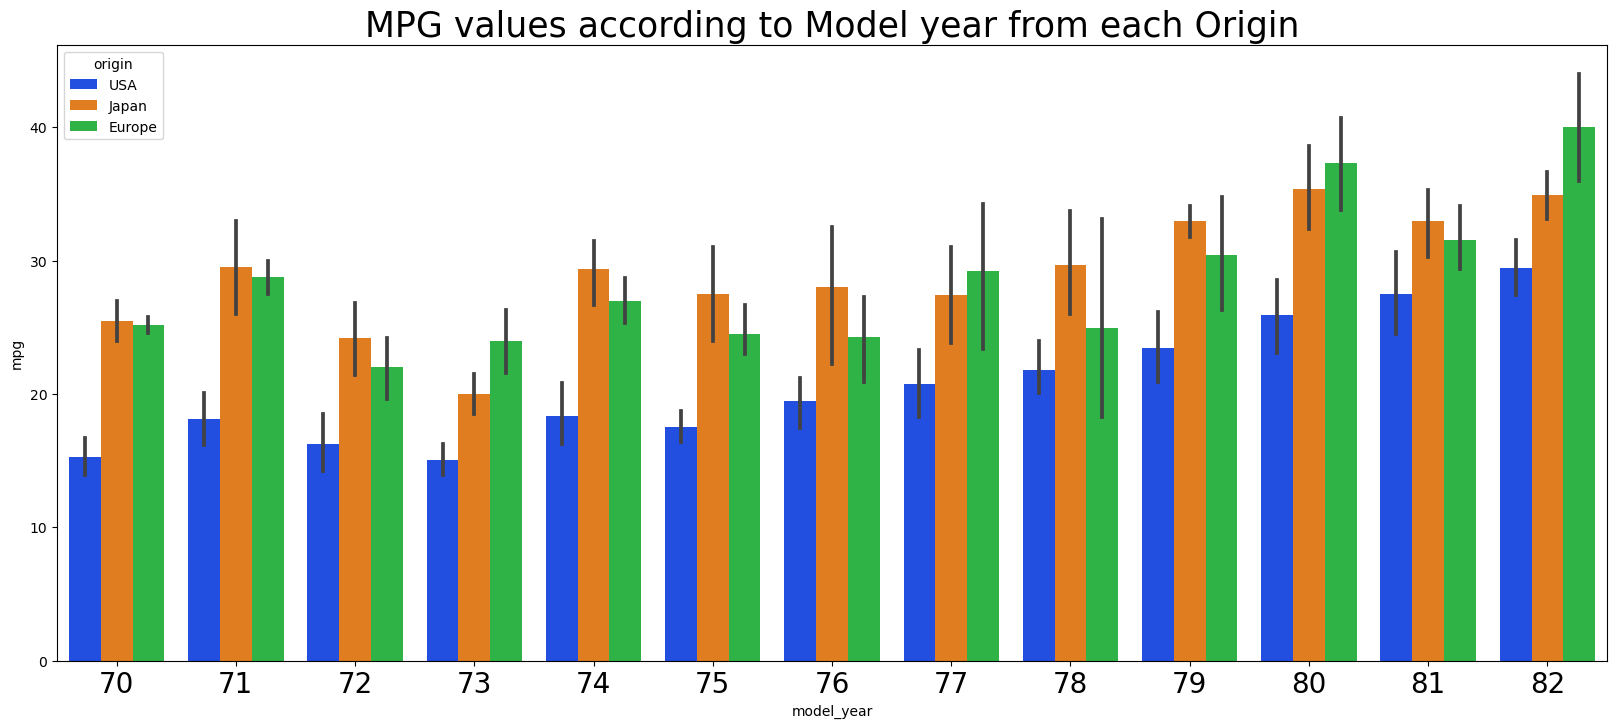

In [58]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Model year from each Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="model_year",y="mpg",data=data,hue="origin")

<AxesSubplot:title={'center':'Average mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

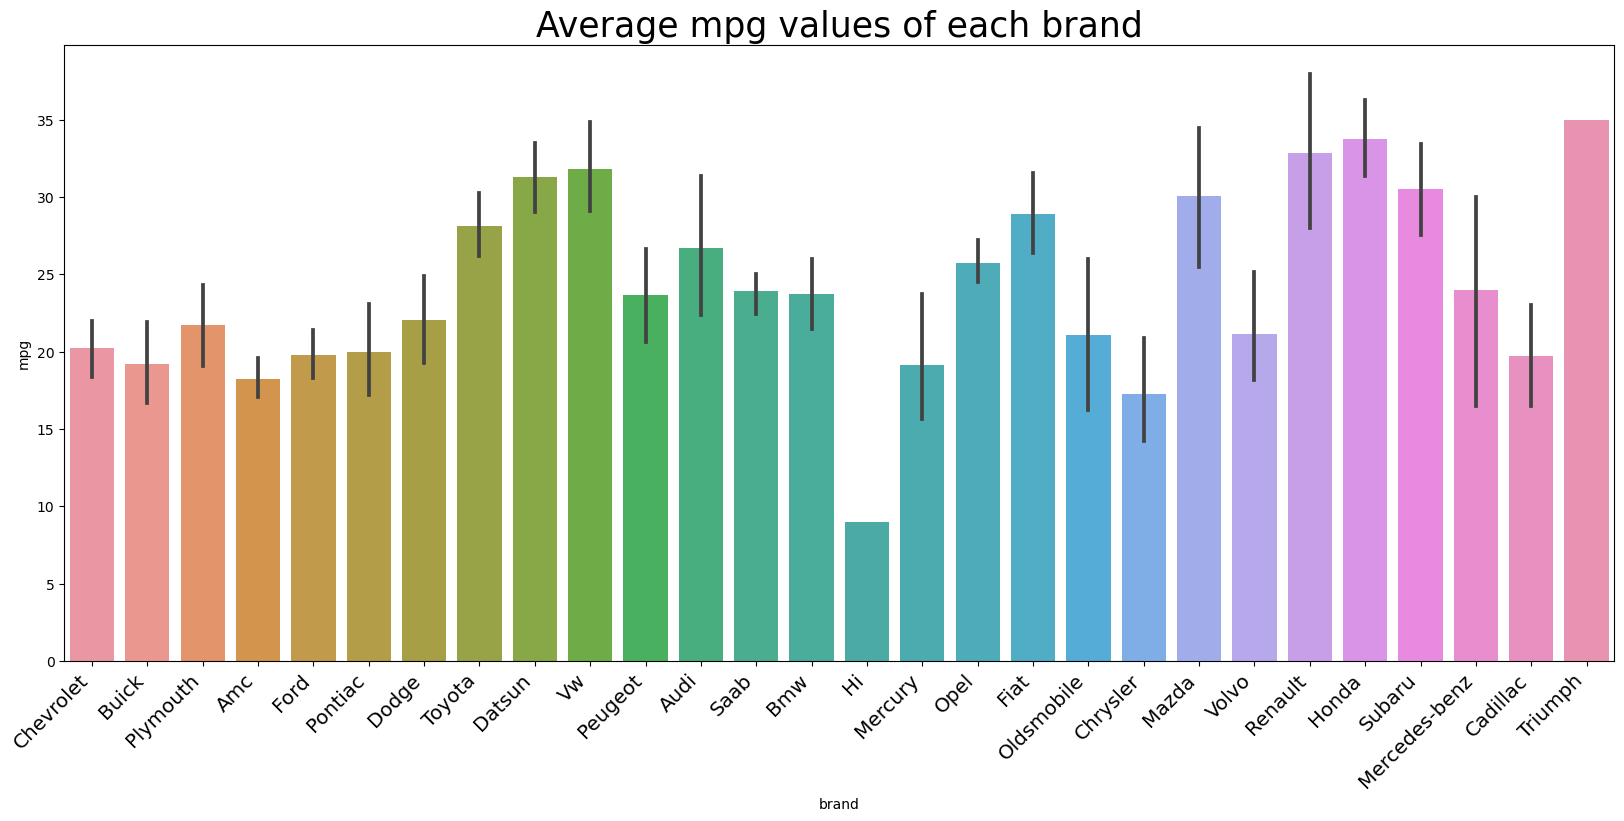

In [59]:

plt.figure(figsize=(20,8))
plt.title("Average mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.barplot(x="brand",y="mpg",data=data)

<AxesSubplot:title={'center':'Maximum mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

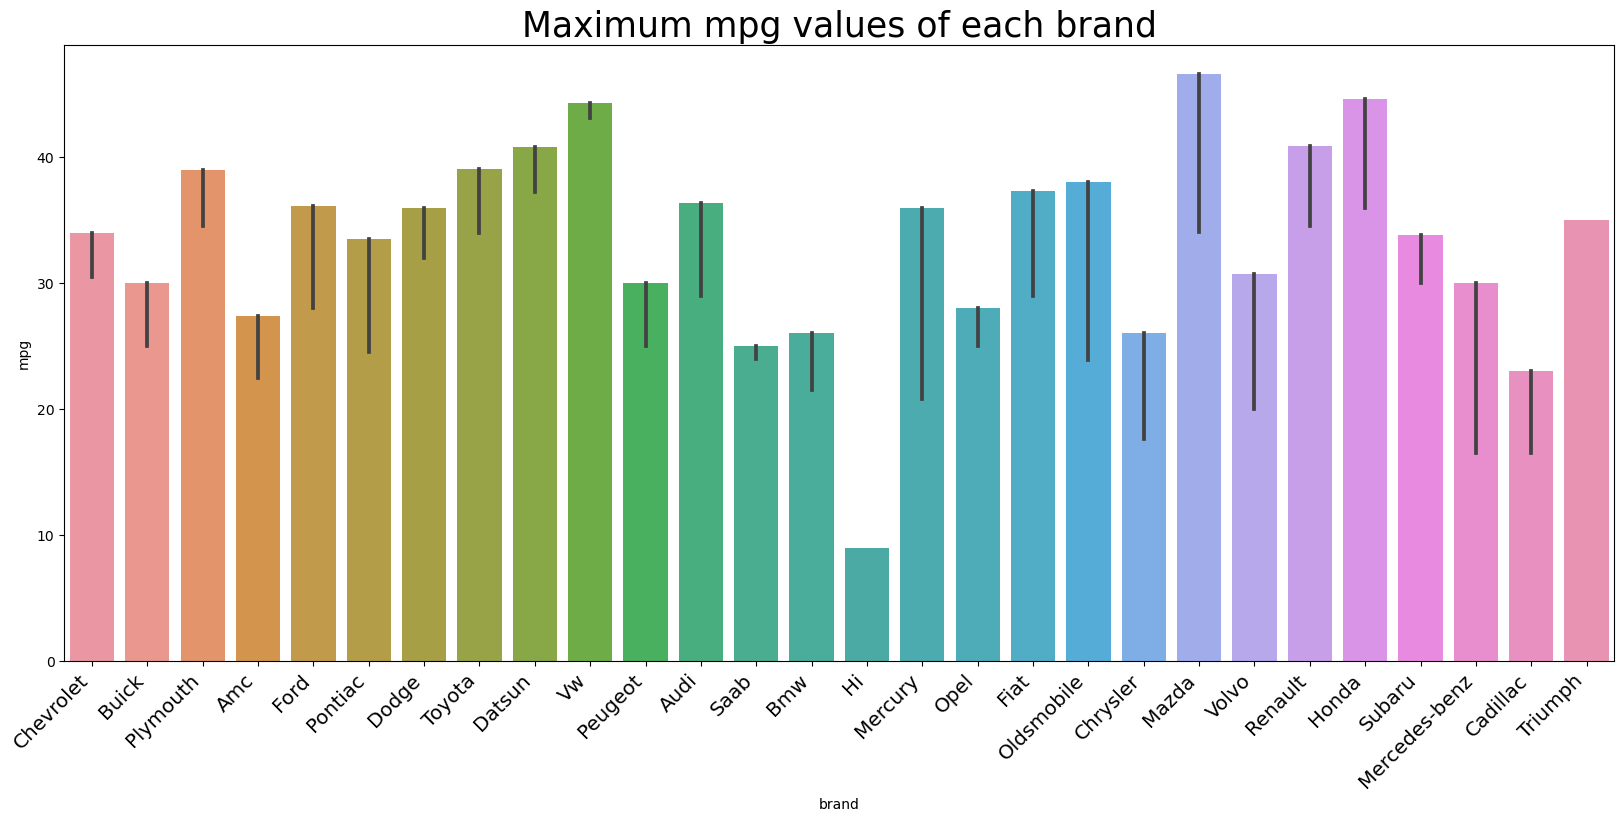

In [60]:
plt.figure(figsize=(20,8))
plt.title("Maximum mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.barplot(x="brand",y="mpg",data=data,estimator=max)

<AxesSubplot:title={'center':'Number of cars according to brand in Top 20 cars with highest Acceleration'}, xlabel='brand', ylabel='count'>

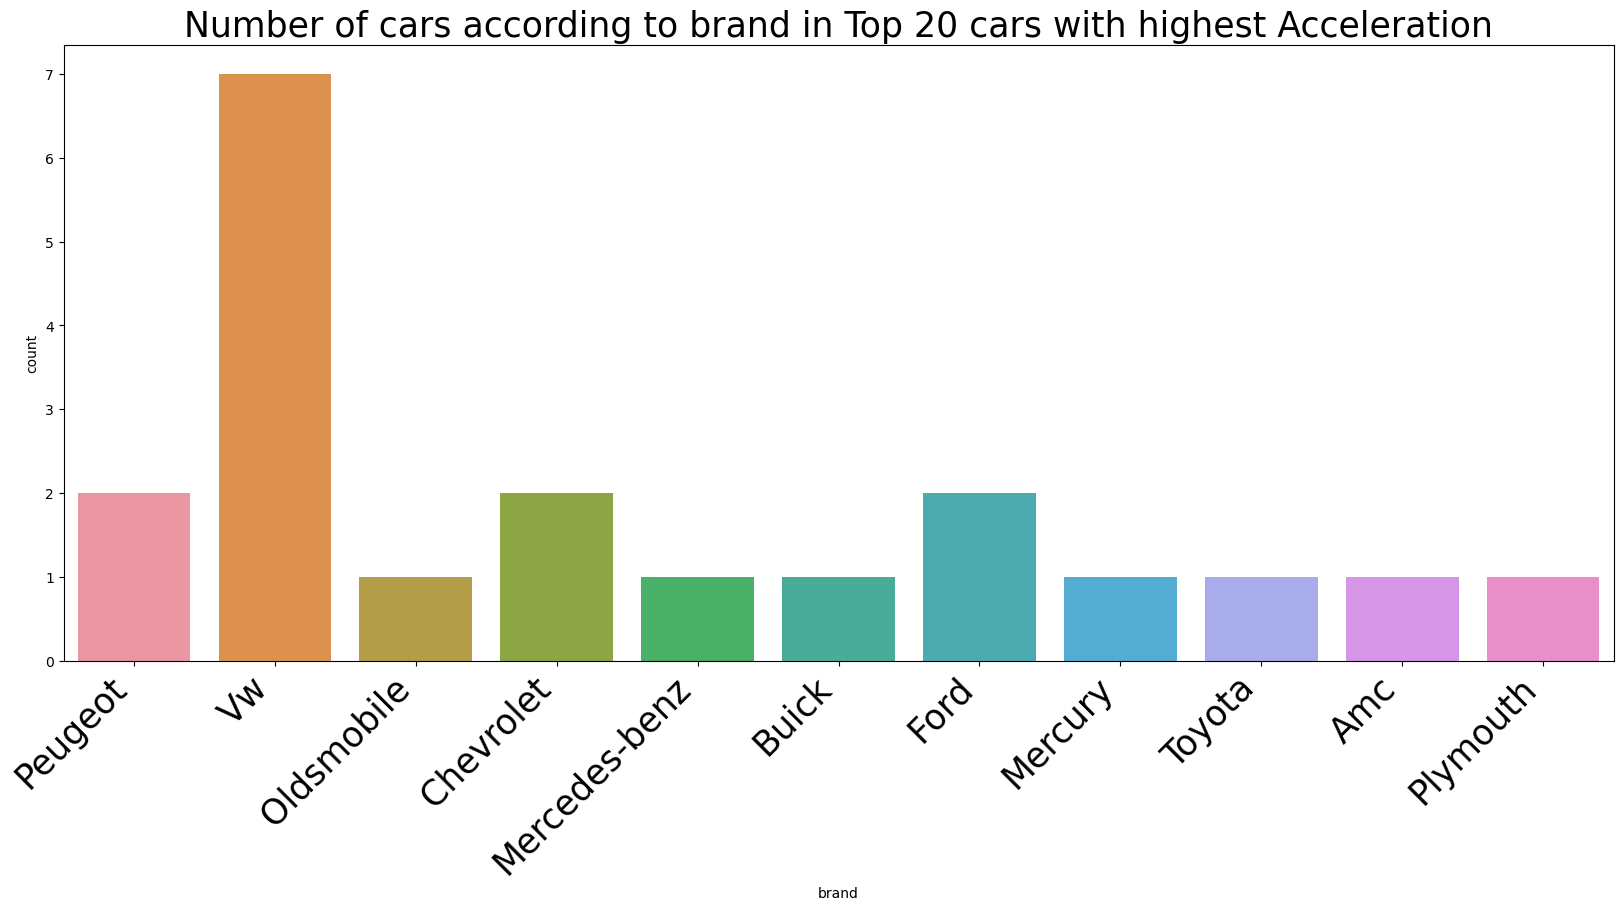

In [61]:
plt.figure(figsize=(20,8))
plt.title("Number of cars according to brand in Top 20 cars with highest Acceleration",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=25)

sns.countplot(data.sort_values(by="acceleration",ascending=False)["brand"][:20])

<AxesSubplot:title={'center':'Average MPG values according to Origin'}, xlabel='origin', ylabel='mpg'>

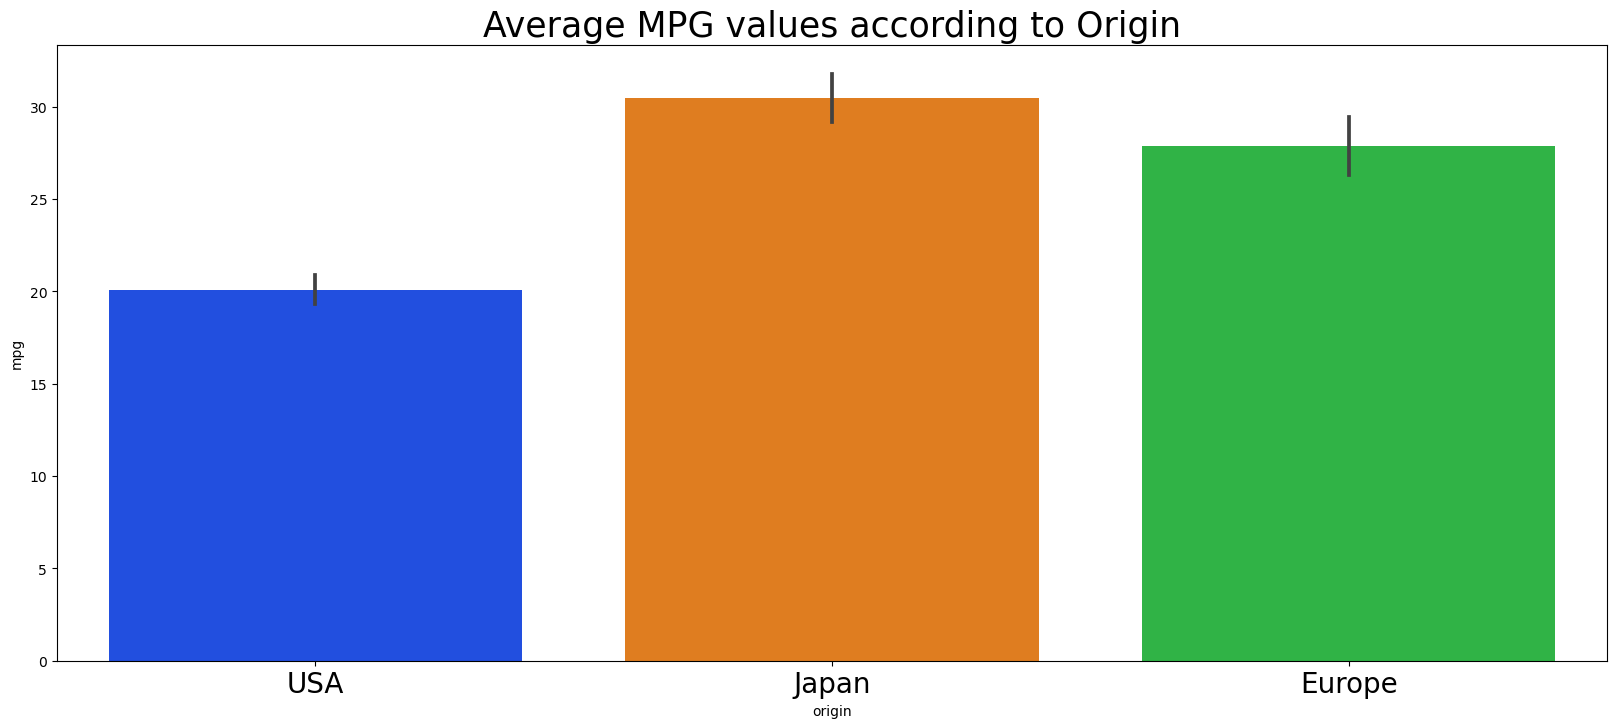

In [62]:
plt.figure(figsize=(20,8))
plt.title("Average MPG values according to Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(y="mpg",x="origin",data=data)

<AxesSubplot:title={'center':'Distribution of MPG'}, xlabel='mpg', ylabel='Density'>

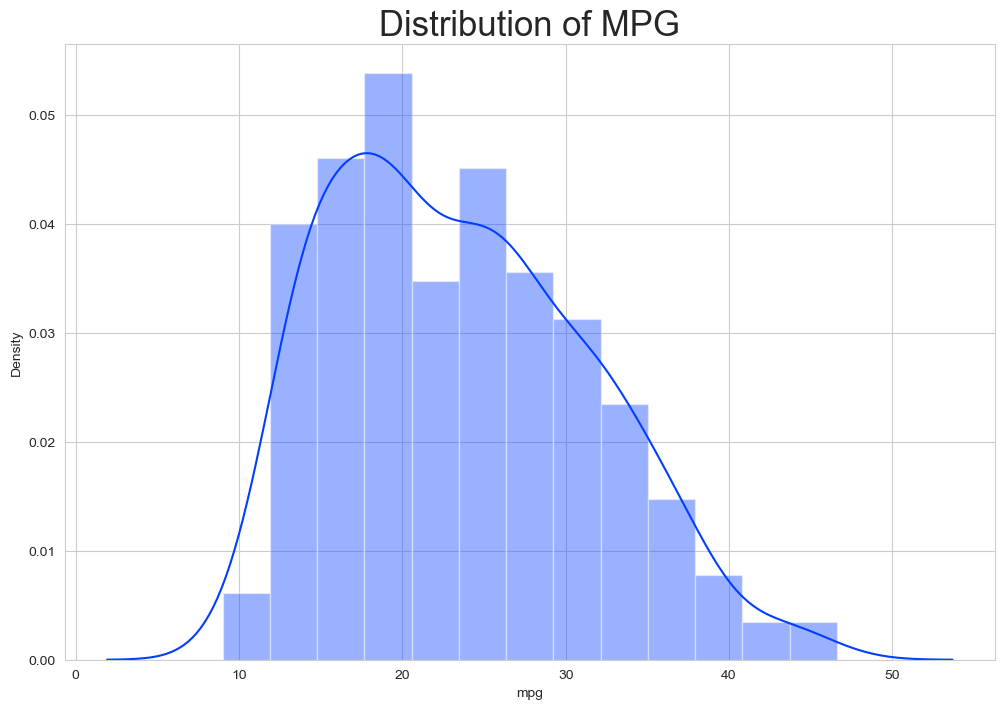

In [63]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))
plt.title("Distribution of MPG",fontsize=25)

sns.distplot(data["mpg"])

<AxesSubplot:title={'center':'Distribution of weight'}, xlabel='weight', ylabel='Density'>

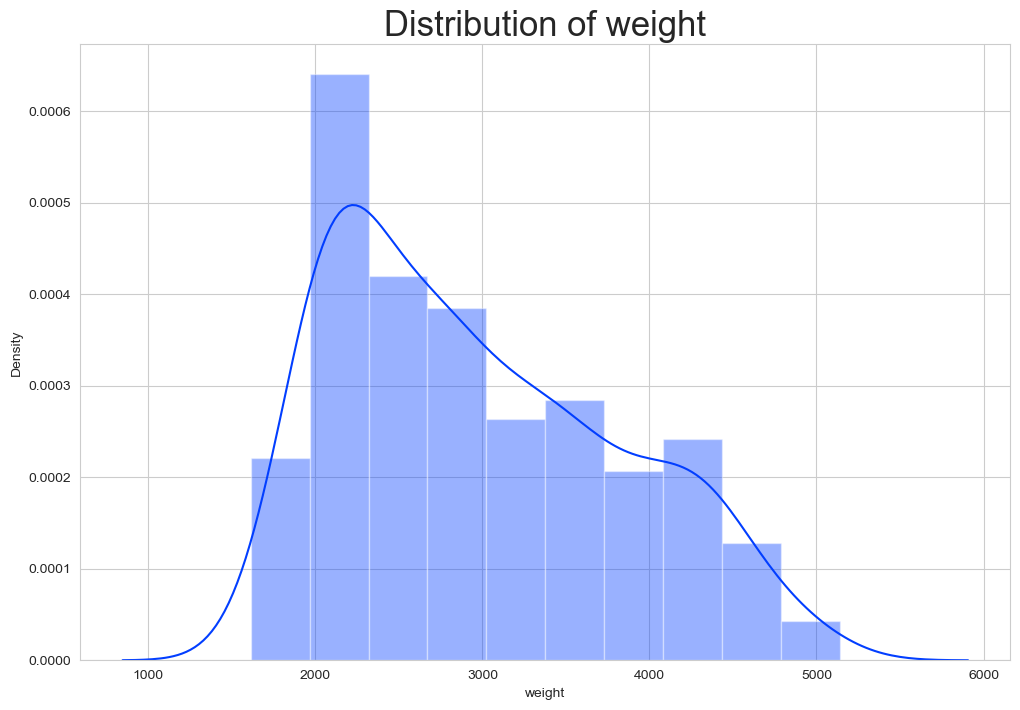

In [64]:
plt.figure(figsize=(12,8))
plt.title("Distribution of weight",fontsize=25)

sns.distplot(data["weight"])

<AxesSubplot:title={'center':'Distribution of Acceleration'}, xlabel='acceleration', ylabel='Density'>

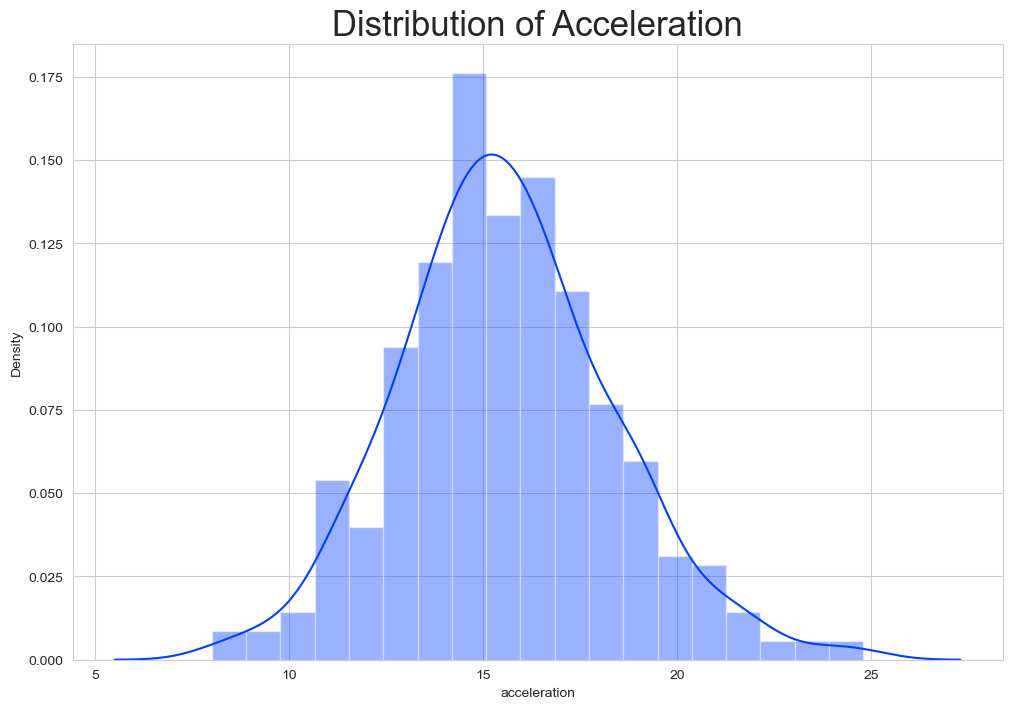

In [65]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Acceleration",fontsize=25)

sns.distplot(data["acceleration"])

<AxesSubplot:title={'center':'Distribution of HorsePower'}, xlabel='horsepower', ylabel='Density'>

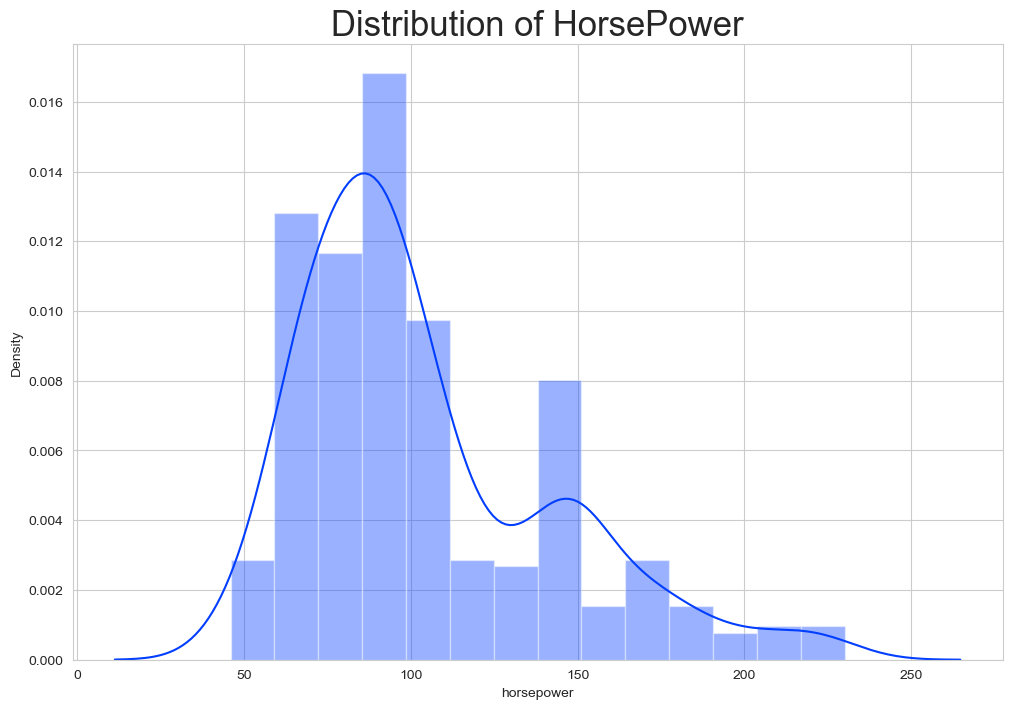

In [66]:
plt.figure(figsize=(12,8))
plt.title("Distribution of HorsePower",fontsize=25)

sns.distplot(data["horsepower"])

<AxesSubplot:title={'center':'Distribution of Displacement'}, xlabel='displacement', ylabel='Density'>

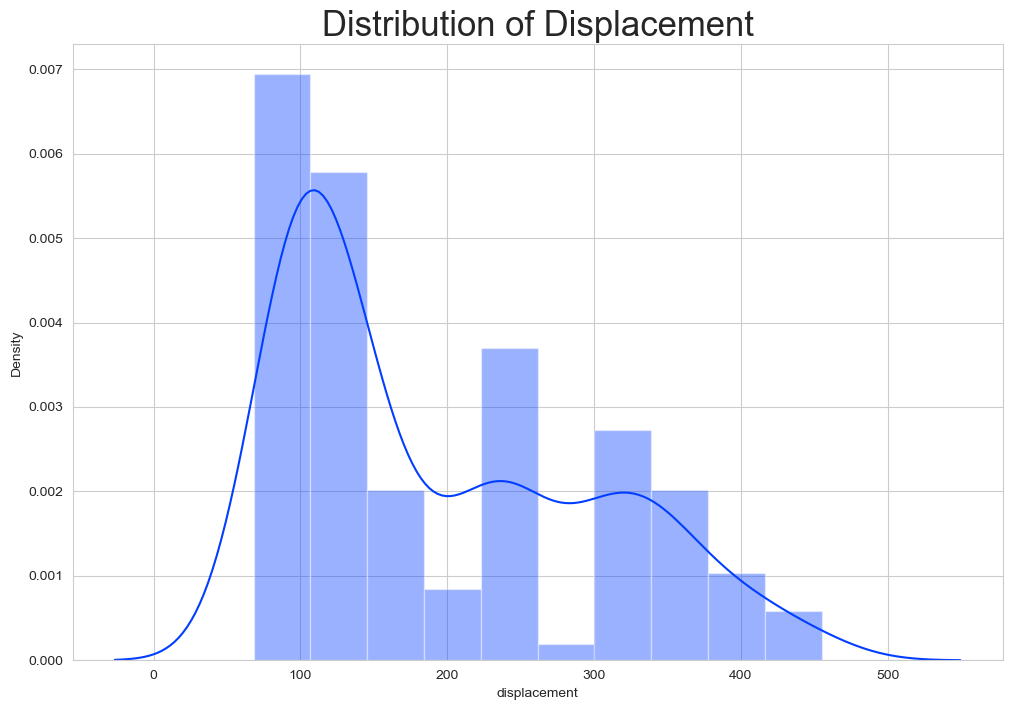

In [67]:

plt.figure(figsize=(12,8))
plt.title("Distribution of Displacement",fontsize=25)

sns.distplot(data["displacement"])

<Figure size 1200x800 with 0 Axes>

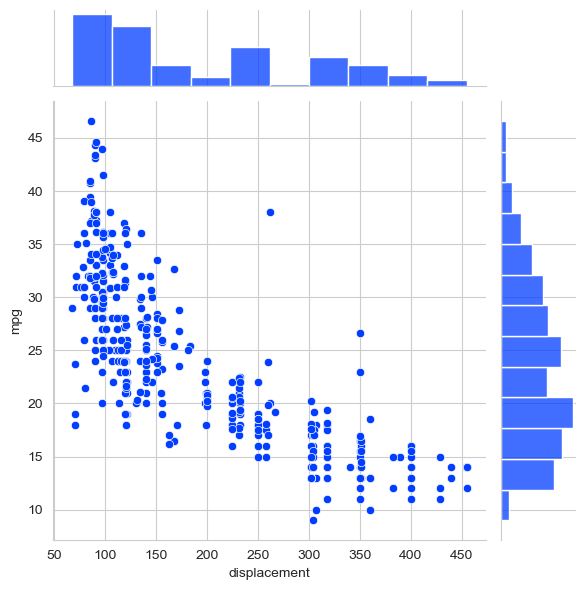

In [68]:
plt.figure(figsize=(12,8))
sns.jointplot("displacement","mpg",data)

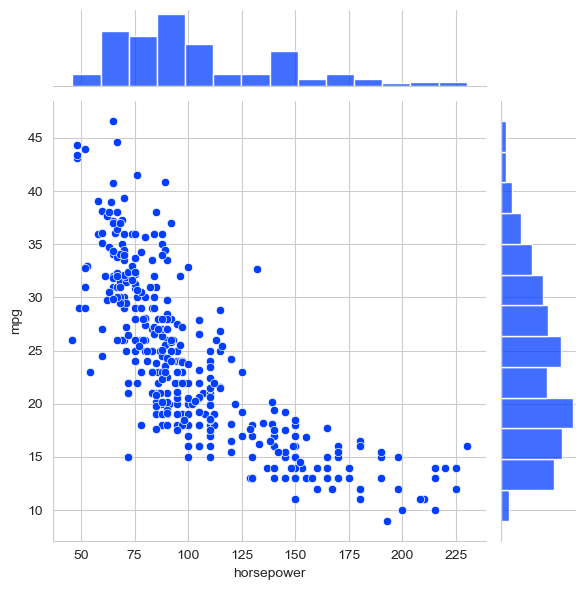

In [69]:
#joint plot for horsepower and weight of car
sns.jointplot("horsepower","mpg",data)

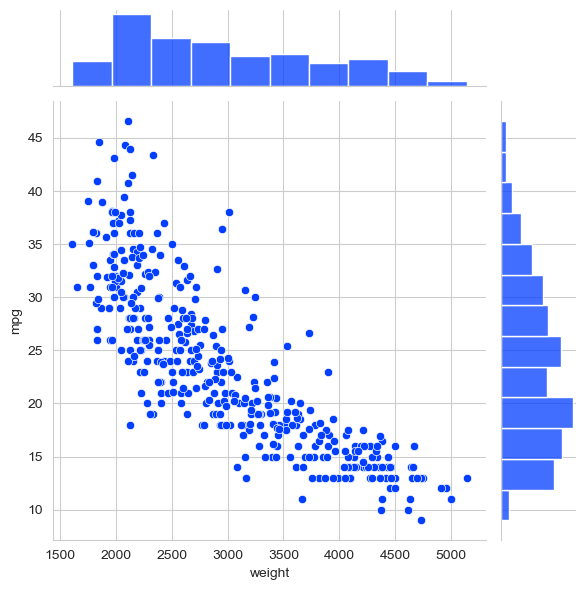

In [70]:
#joint plot for horsepower and weight of car
sns.jointplot("weight","mpg",data)

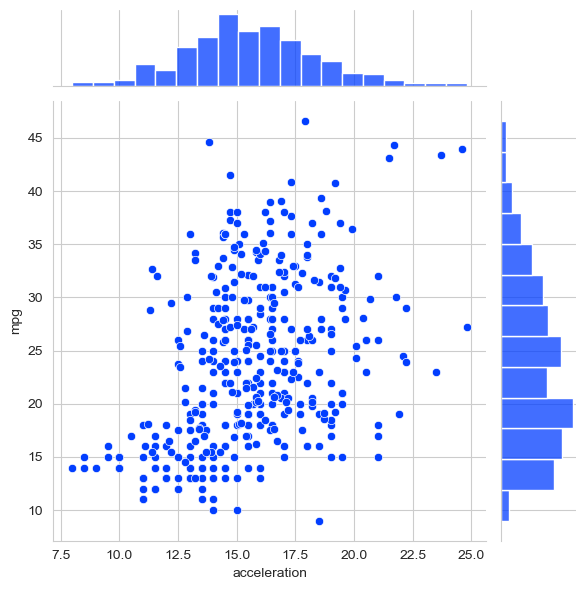

In [71]:
#joint plot for horsepower and weight of car
sns.jointplot("acceleration","mpg",data)

<AxesSubplot:title={'center':'MPG values according to Origin'}, xlabel='origin', ylabel='mpg'>

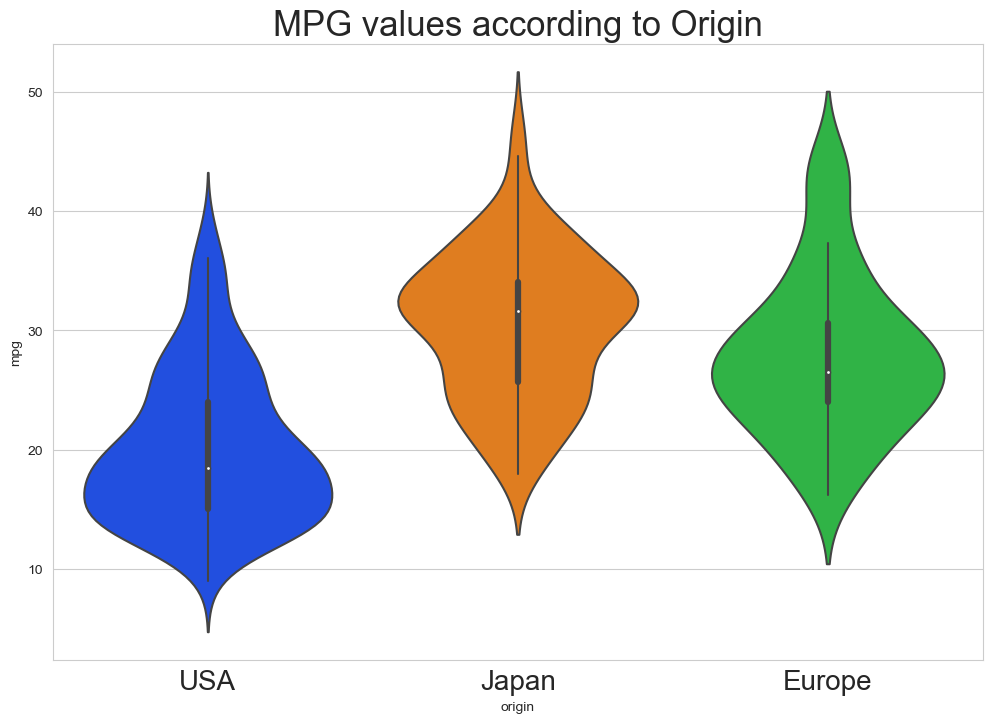

In [72]:
plt.figure(figsize=(12,8))
plt.title("MPG values according to Origin",fontsize=25)
plt.xticks(fontsize=20)

sns.violinplot(x="origin",y="mpg",data=data)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

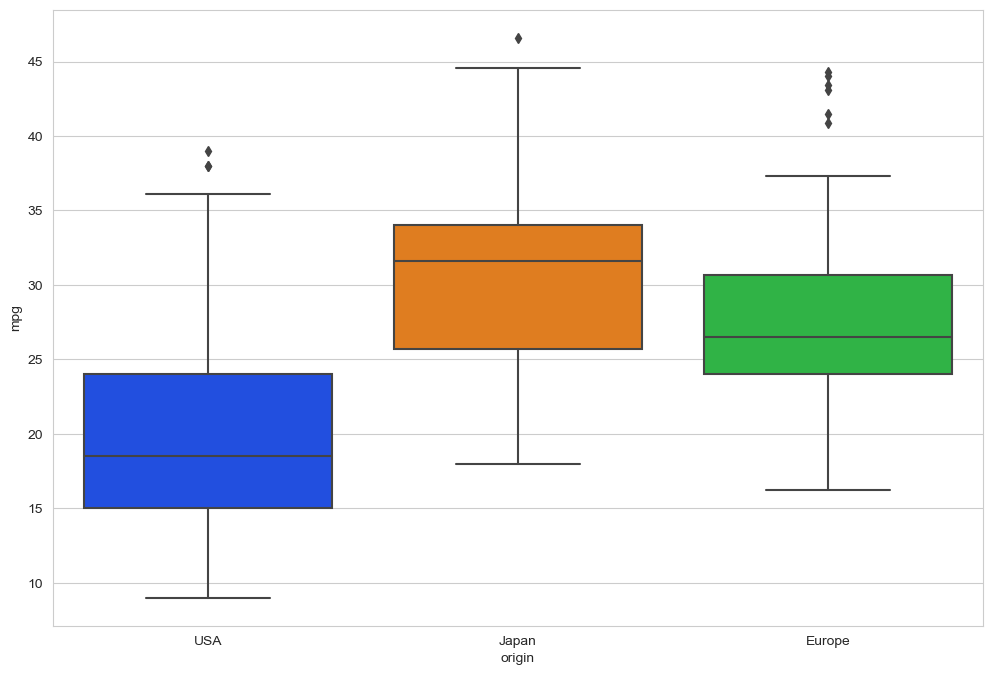

In [73]:
plt.figure(figsize=(12,8))
sns.boxplot(x="origin",y="mpg",data=data)

<AxesSubplot:title={'center':'MPG values according to Model Year'}, xlabel='model_year', ylabel='mpg'>

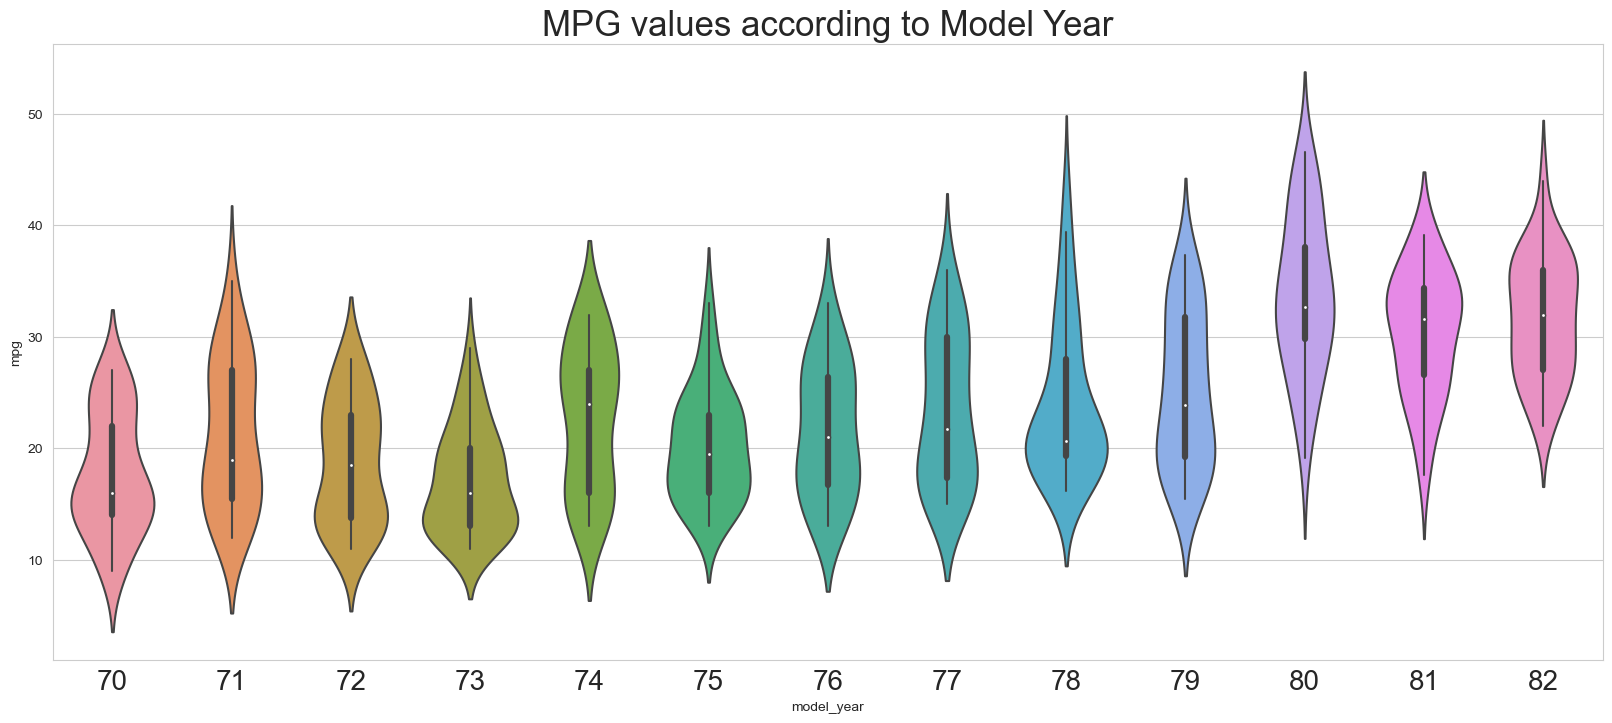

In [74]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Model Year",fontsize=25)
plt.xticks(fontsize=20)

sns.violinplot(x="model_year",y="mpg",data=data)

<AxesSubplot:title={'center':'MPG values according to Model Year'}, xlabel='model_year', ylabel='mpg'>

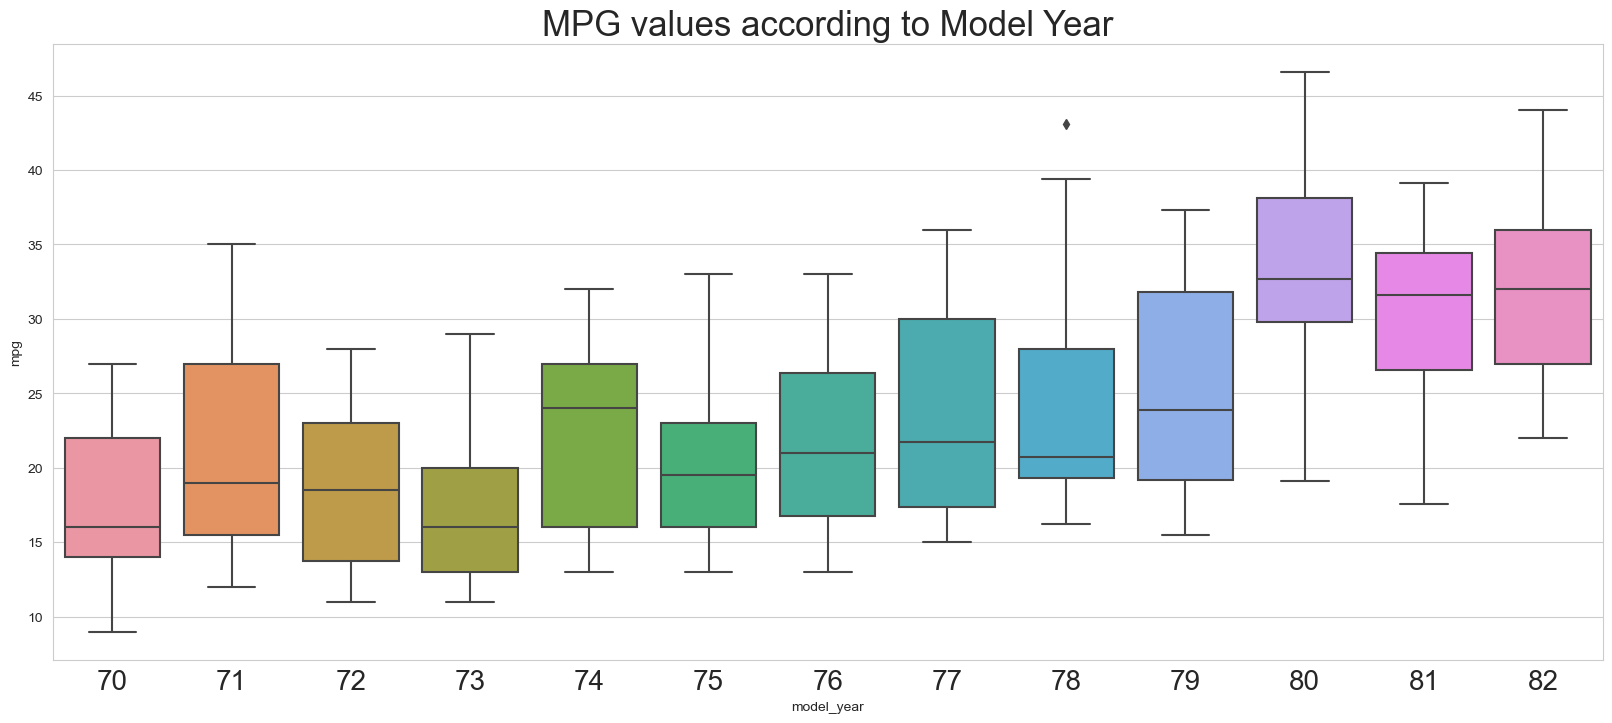

In [75]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Model Year",fontsize=25)
plt.xticks(fontsize=20)

sns.boxplot(x="model_year",y="mpg",data=data)

<AxesSubplot:title={'center':'Mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

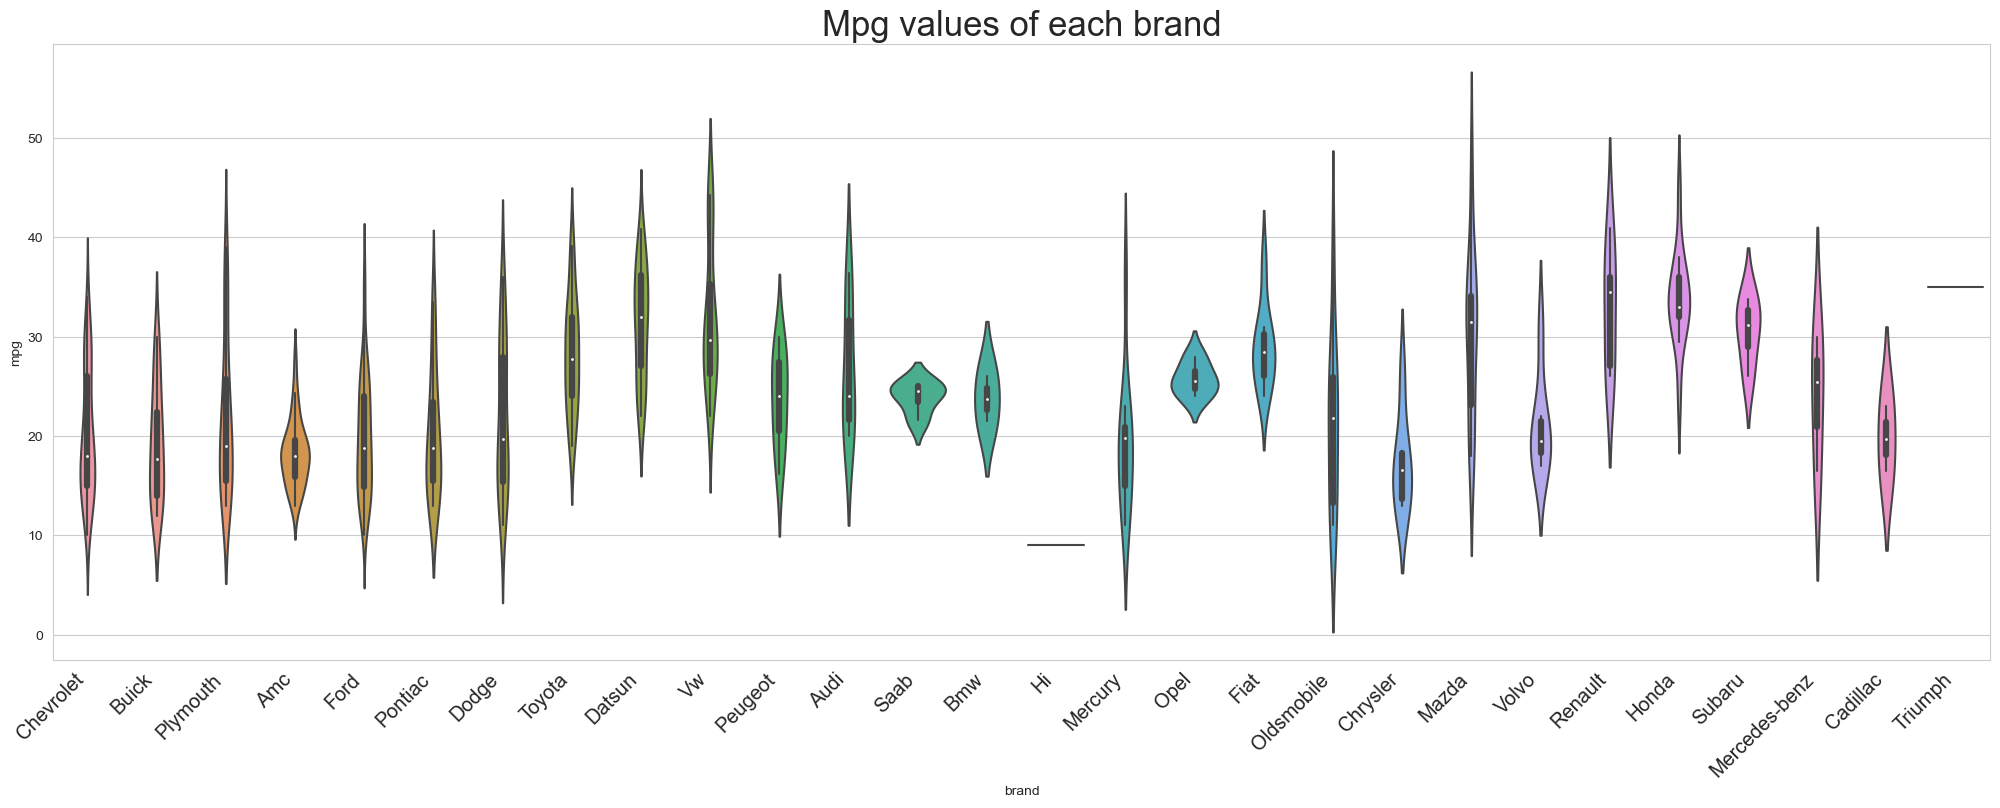

In [76]:
plt.figure(figsize=(25,8))
plt.title("Mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.violinplot(x="brand",y="mpg",data=data)

<AxesSubplot:title={'center':'Mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

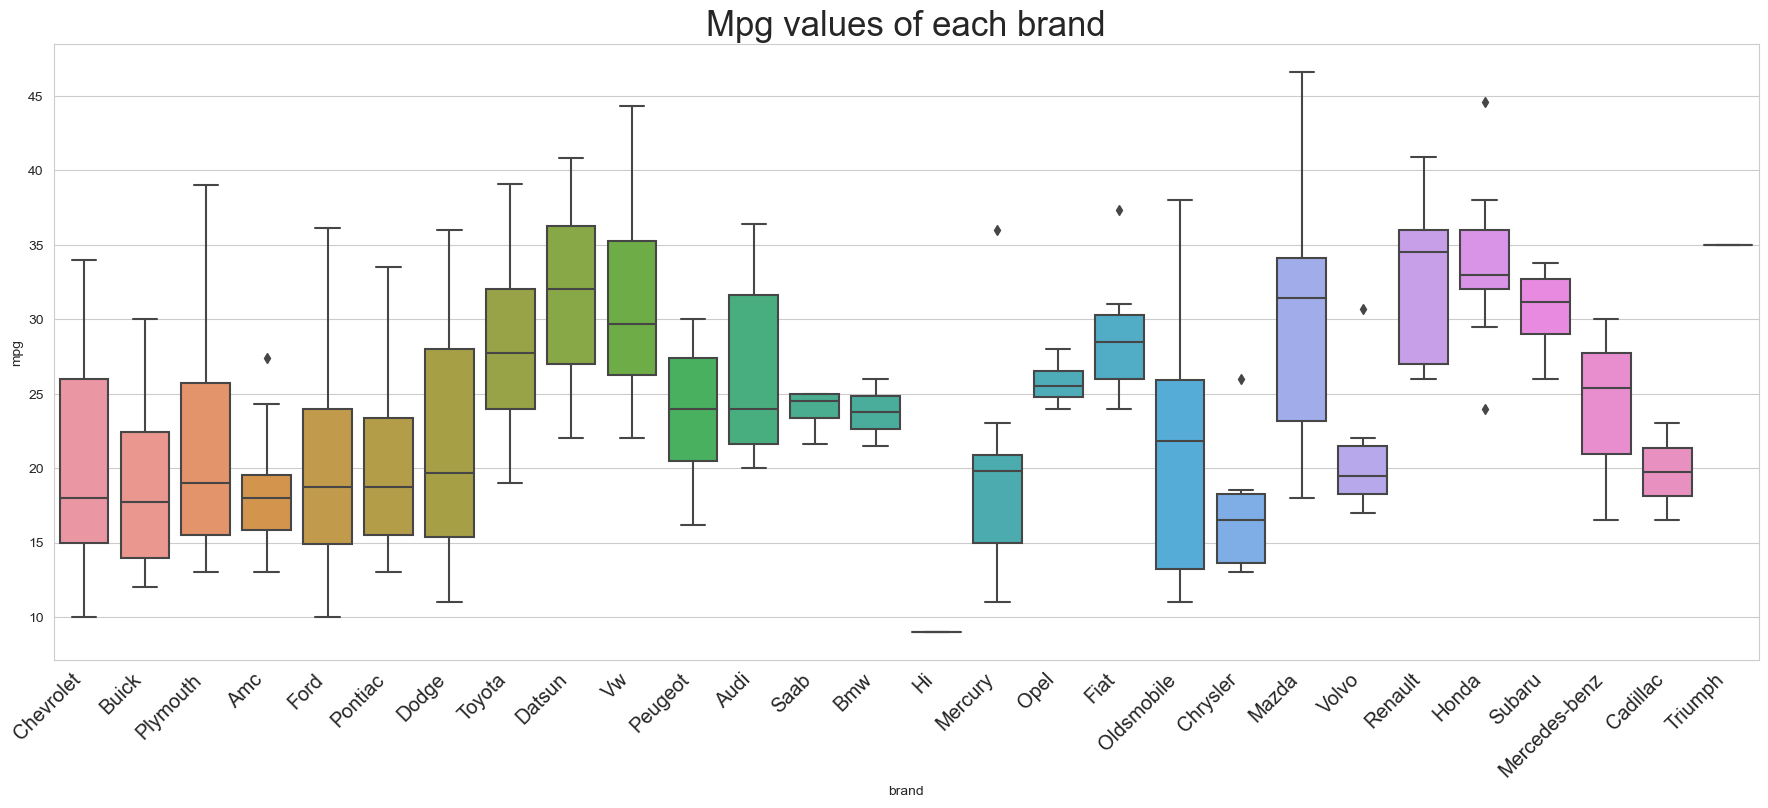

In [77]:

plt.figure(figsize=(22,8))
plt.title("Mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.boxplot(x="brand",y="mpg",data=data)

<AxesSubplot:title={'center':'Mpg values of each brand'}, xlabel='brand', ylabel='mpg'>

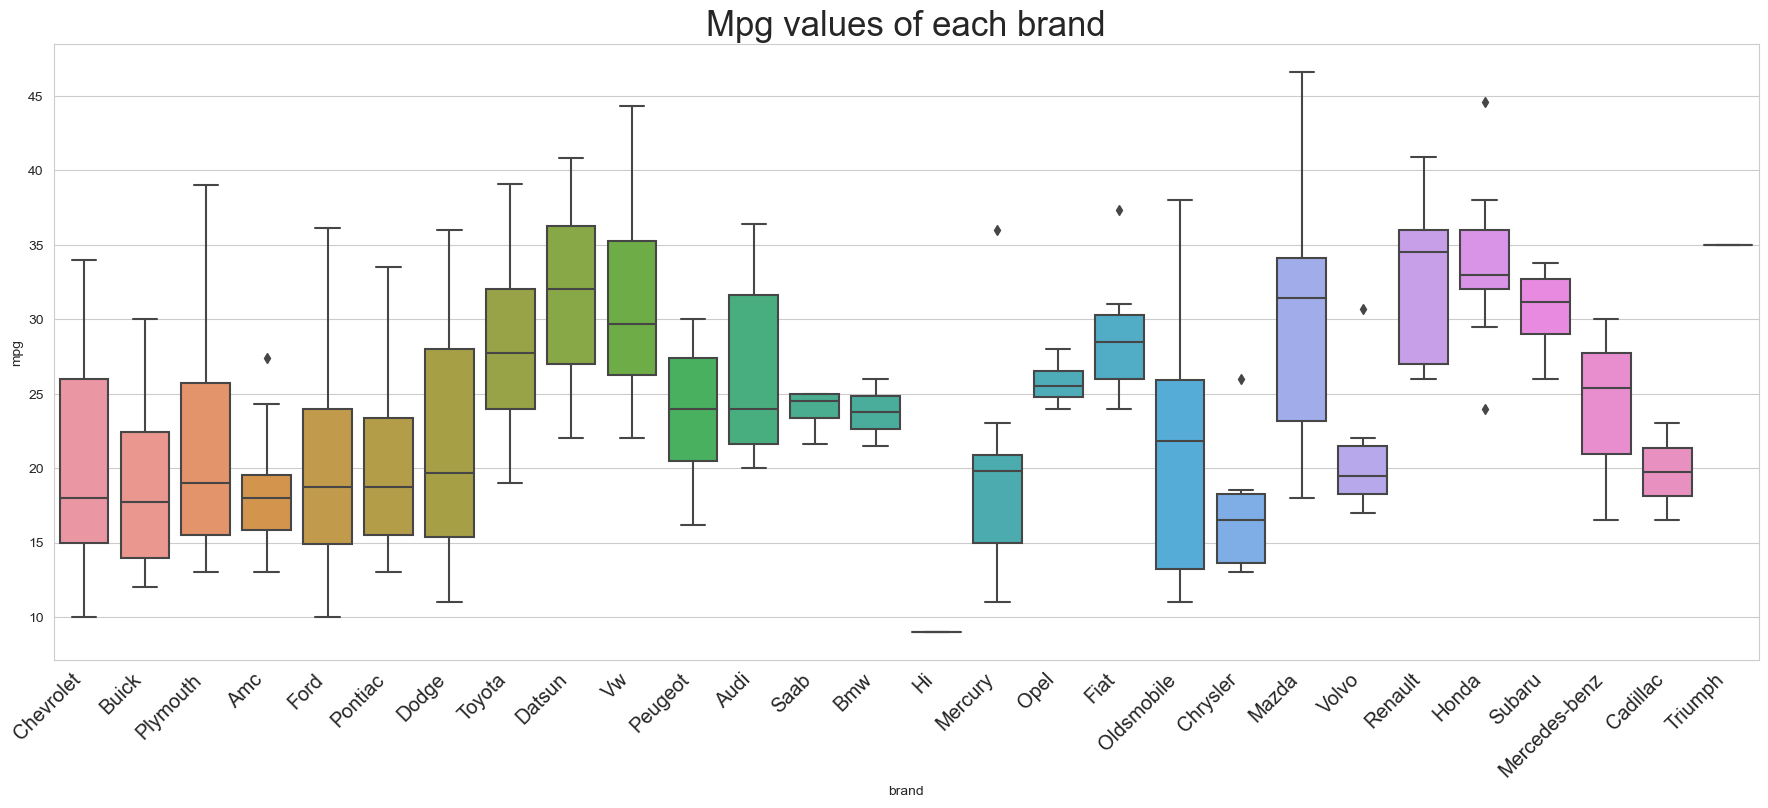

In [78]:

plt.figure(figsize=(22,8))
plt.title("Mpg values of each brand",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.boxplot(x="brand",y="mpg",data=data)

<AxesSubplot:title={'center':'MPG values according to Number of Cylinders'}, xlabel='cylinders', ylabel='mpg'>

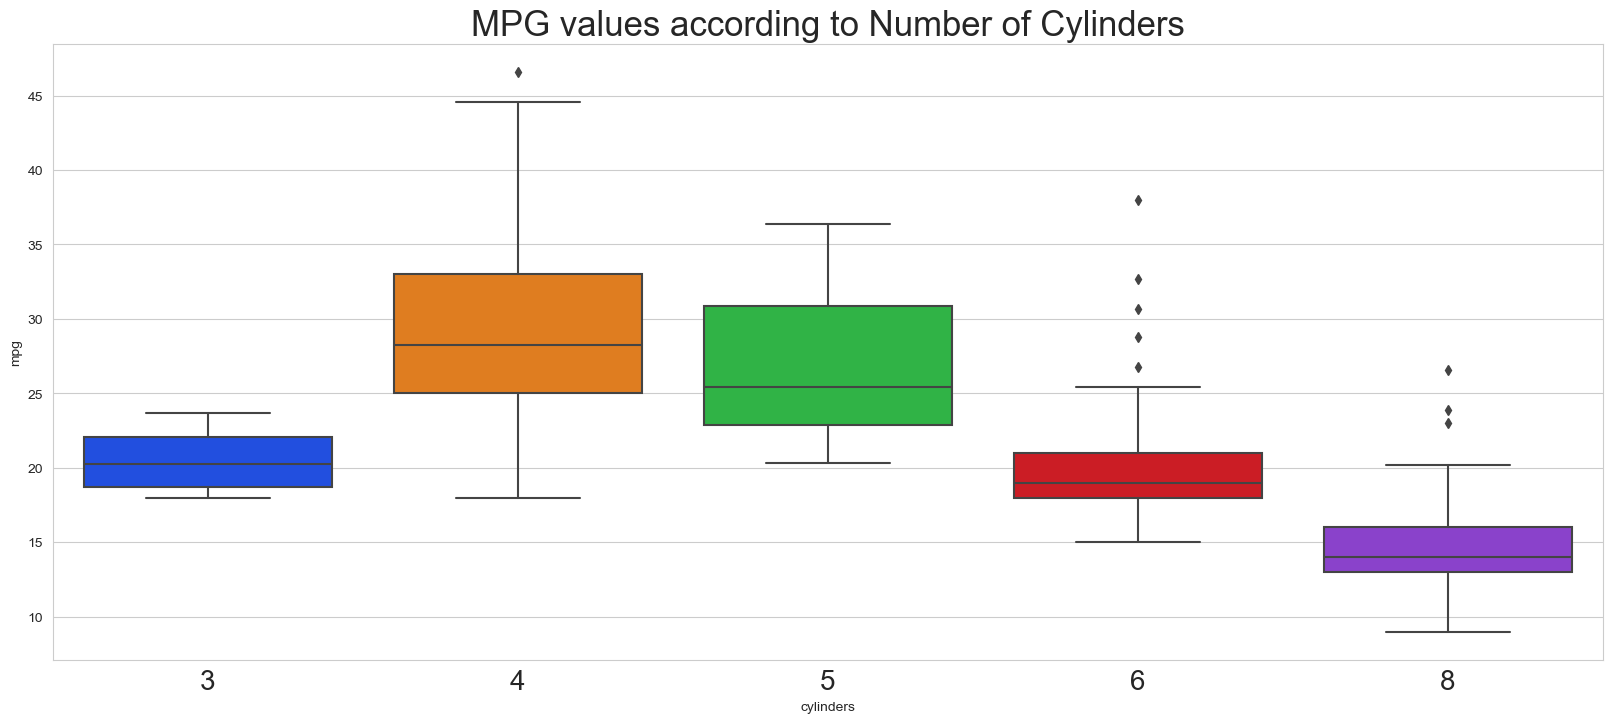

In [79]:
plt.figure(figsize=(20,8))
plt.title("MPG values according to Number of Cylinders",fontsize=25)
plt.xticks(fontsize=20)

sns.boxplot(x="cylinders",y="mpg",data=data)

<AxesSubplot:>

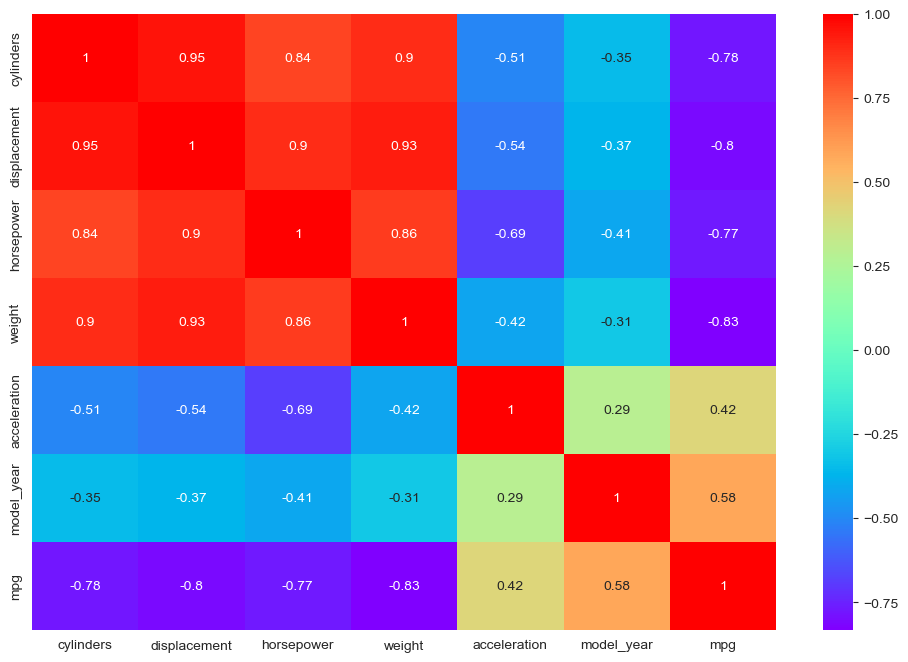

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

<Figure size 1200x800 with 0 Axes>

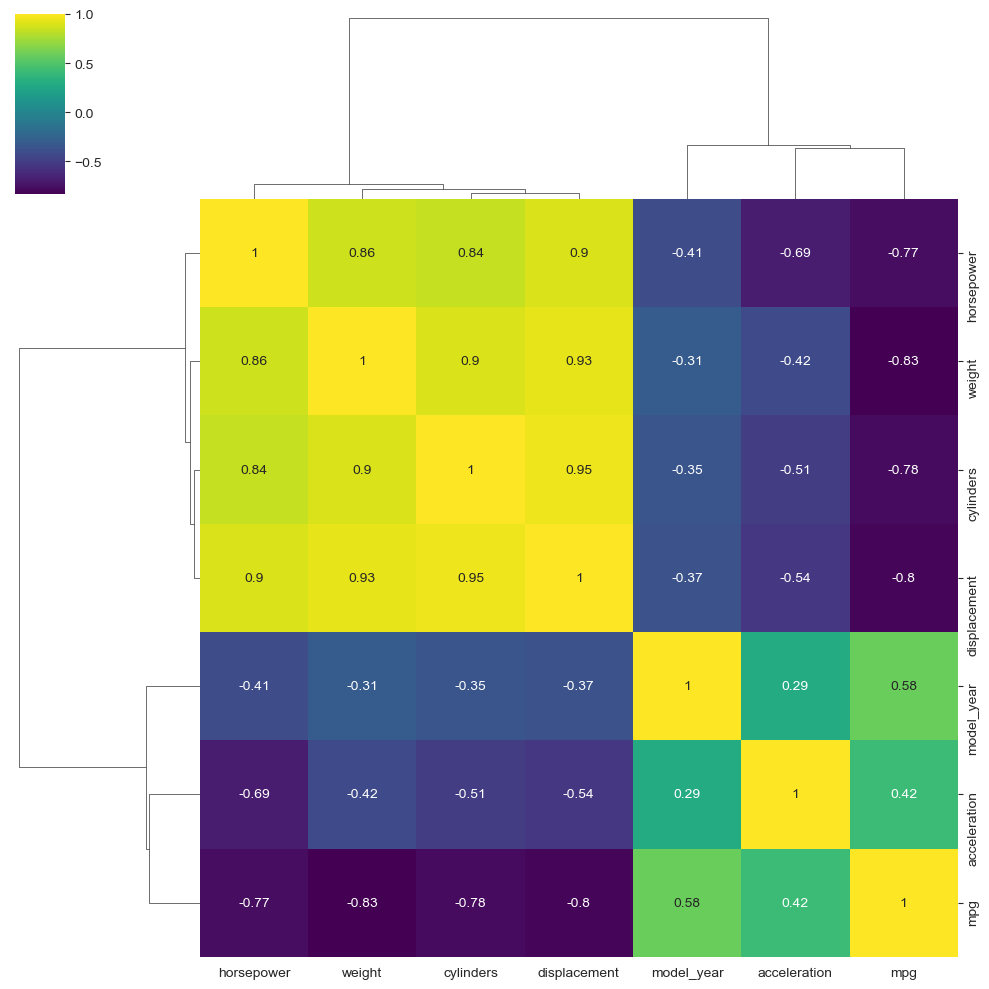

In [81]:

plt.figure(figsize=(12,8))
sns.clustermap(data.corr(),cmap="viridis",annot=True)

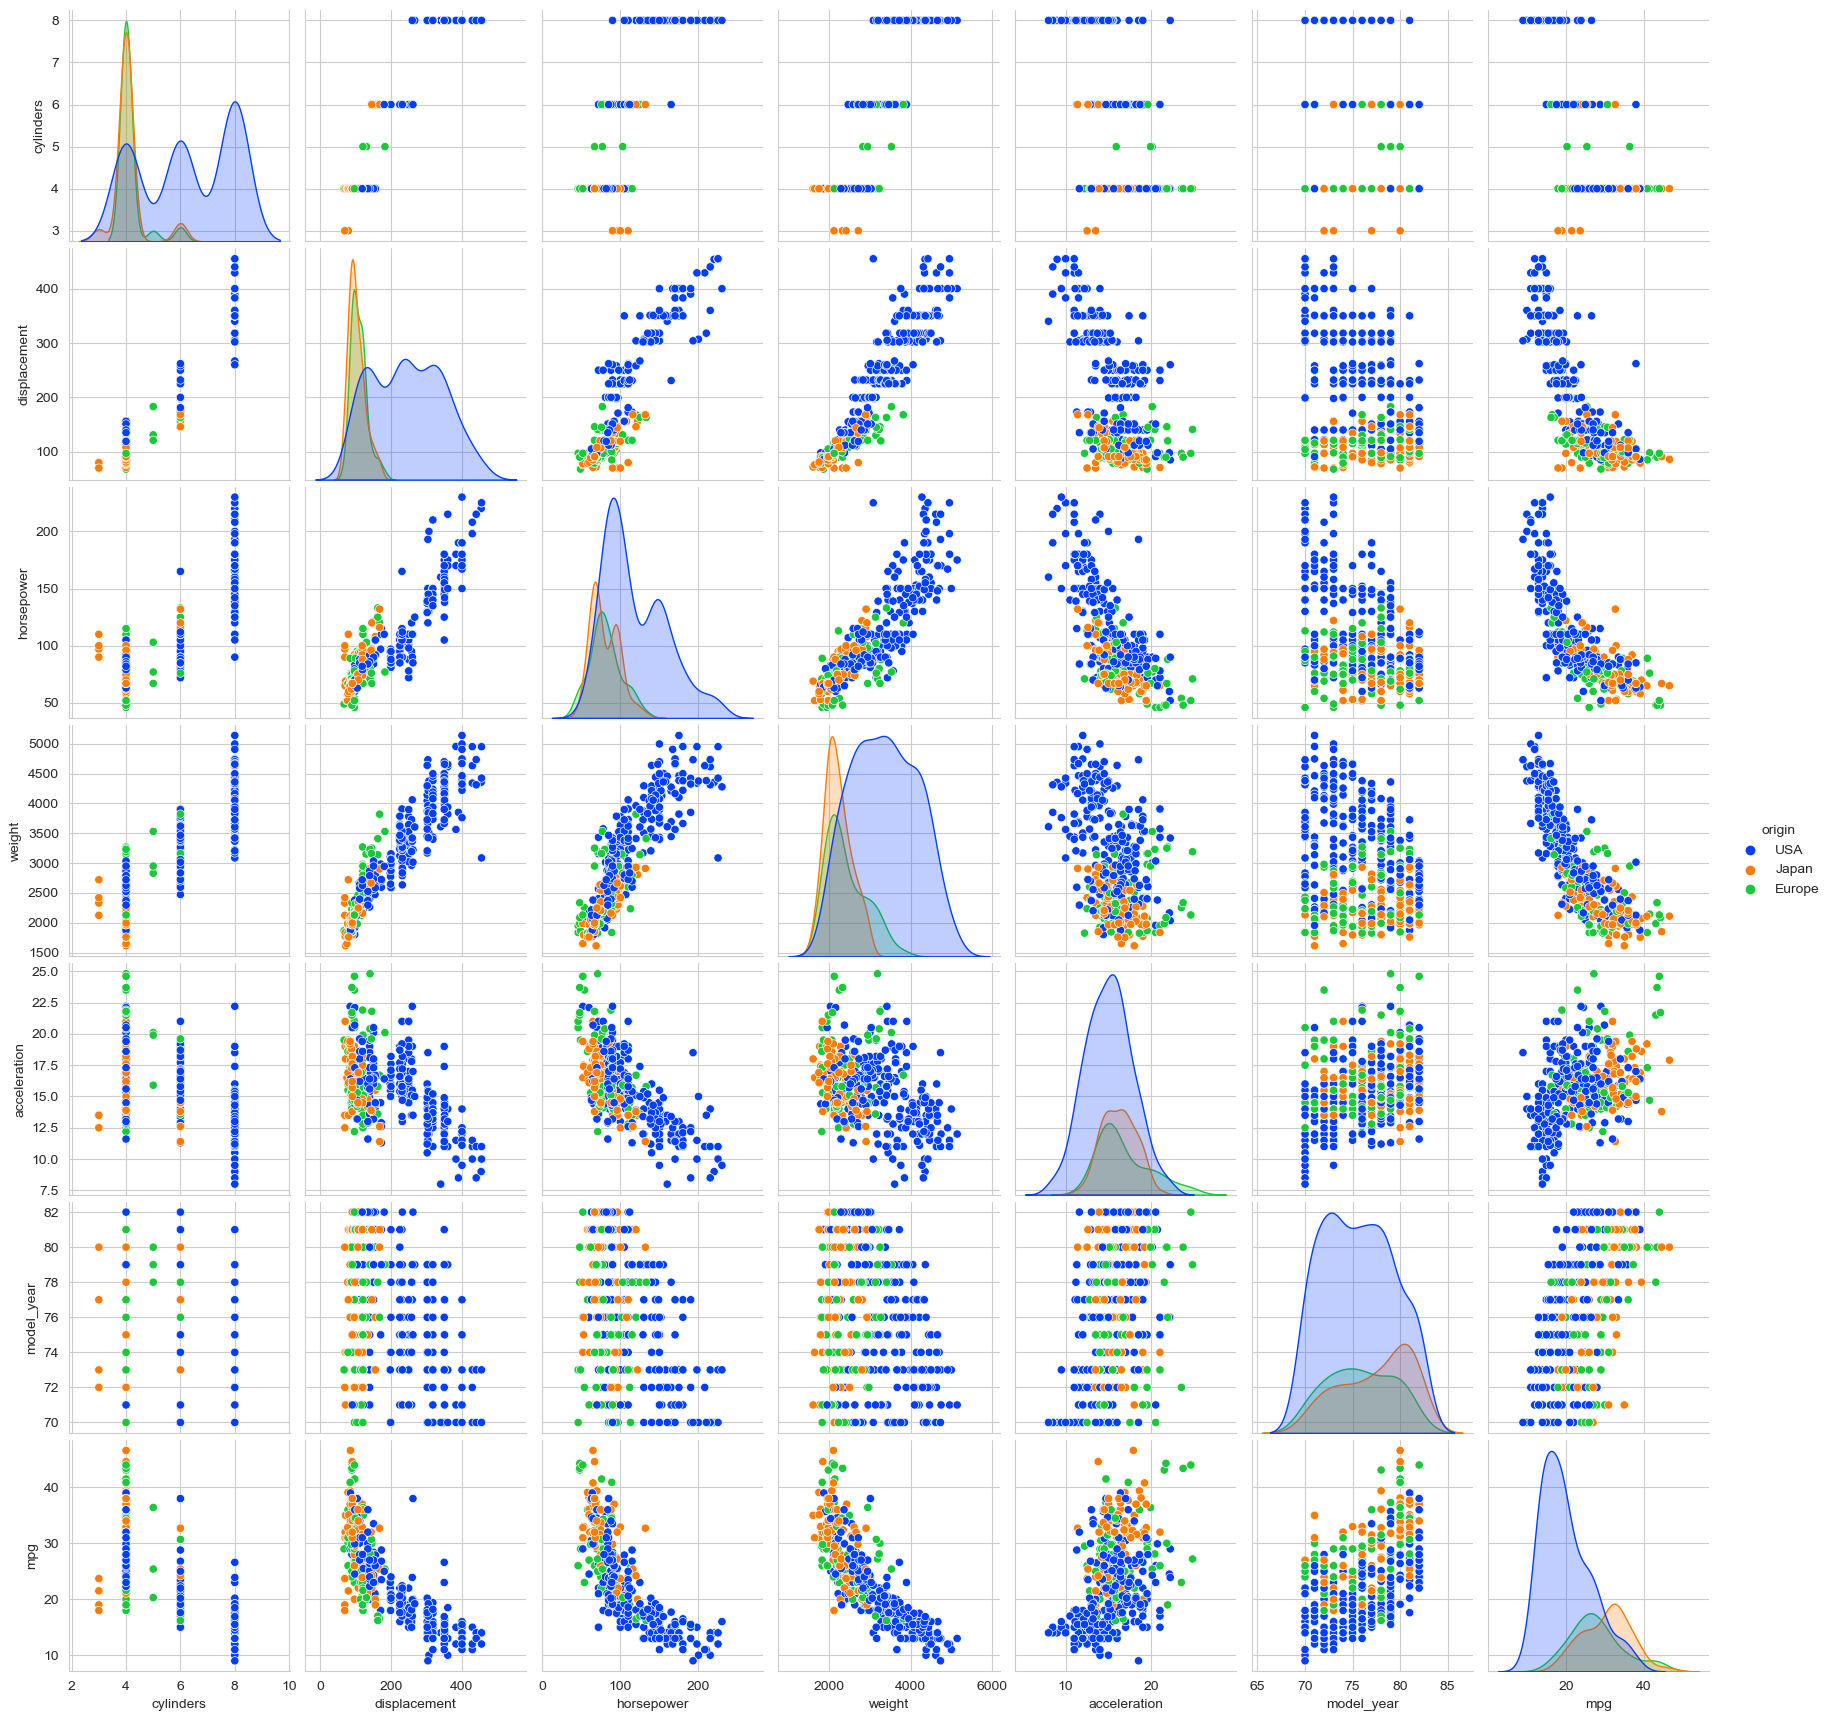

In [82]:
sns.pairplot(data,hue="origin")

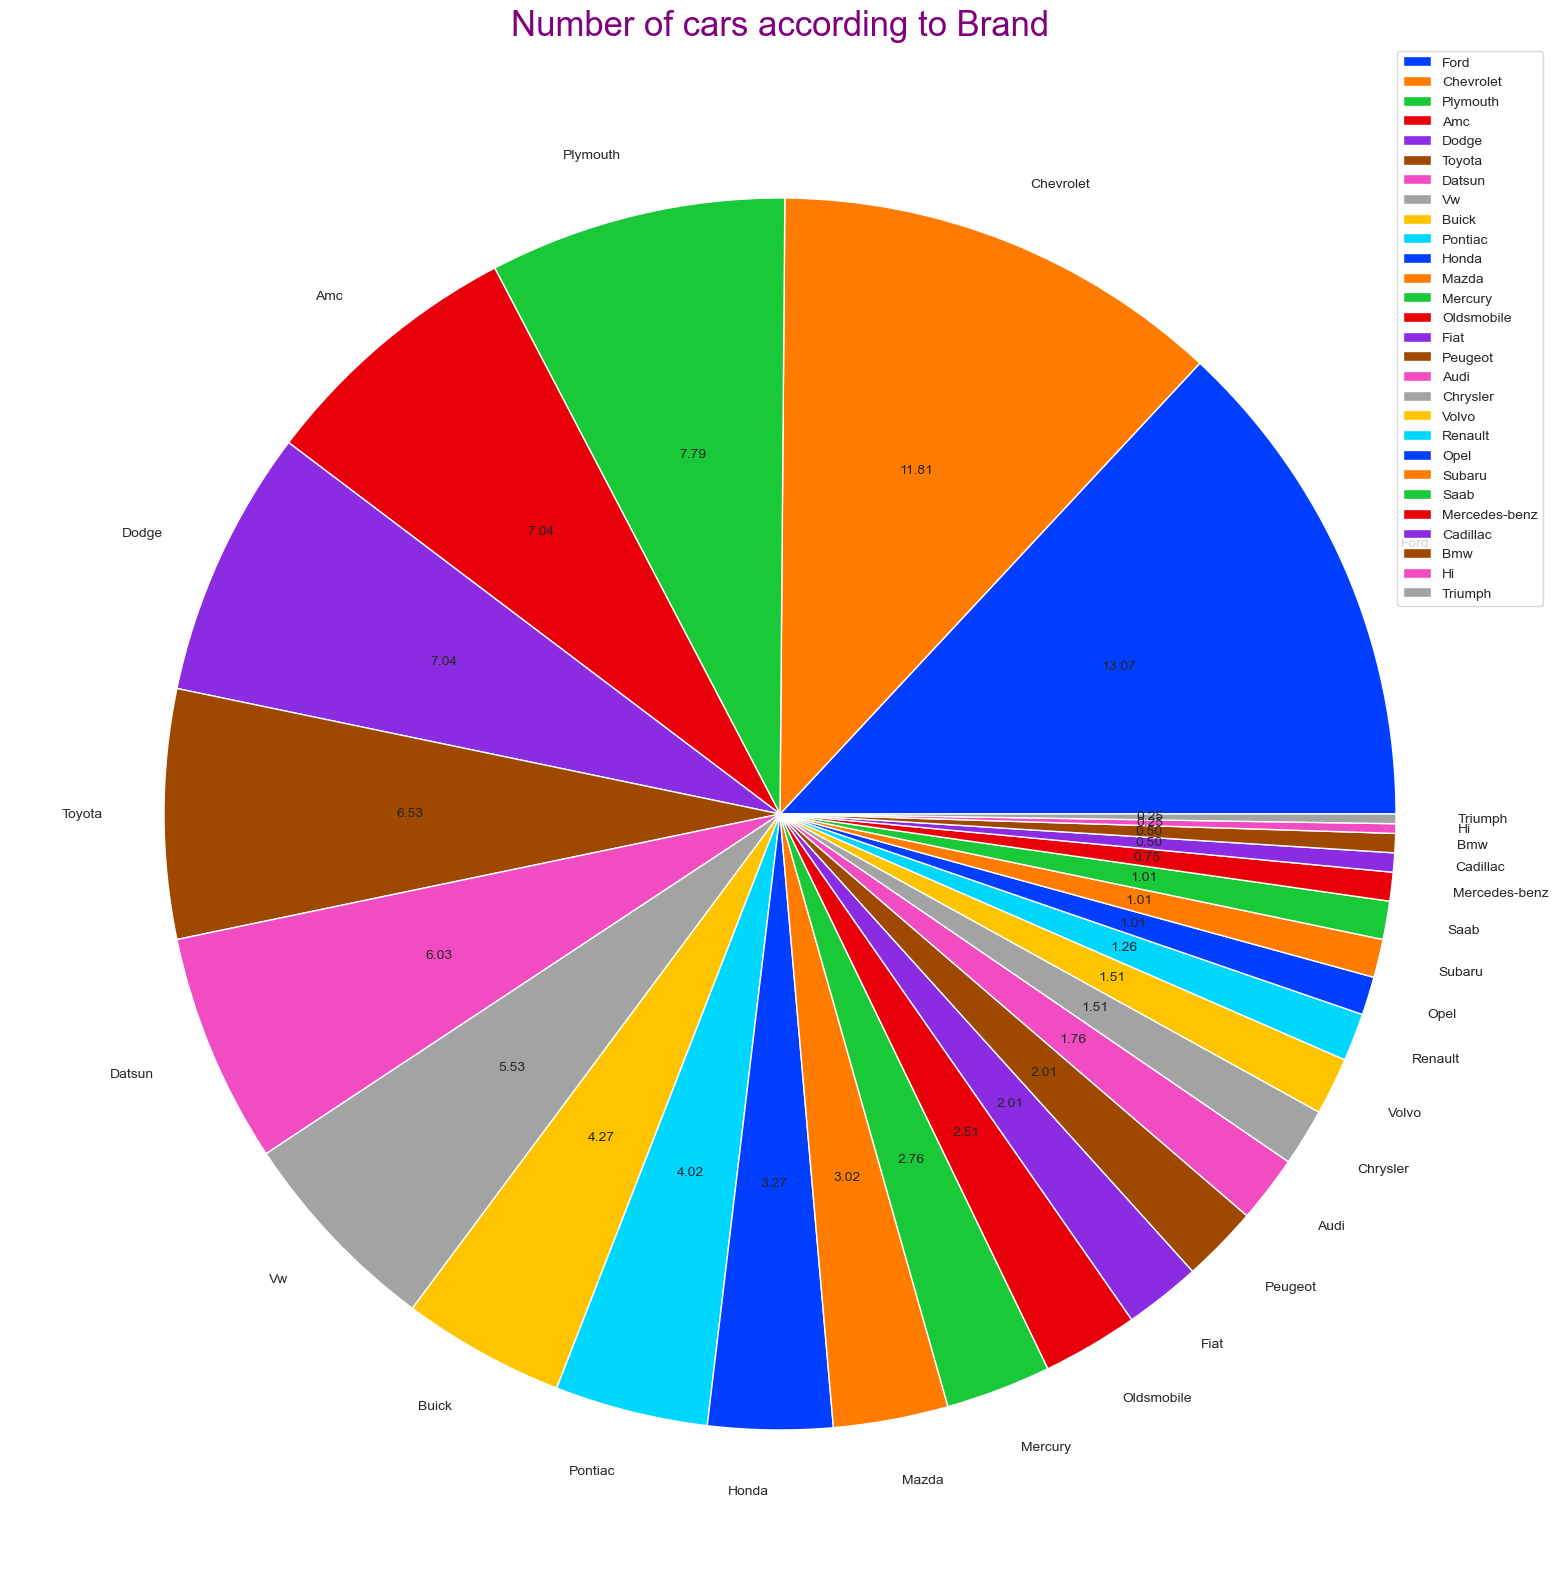

In [83]:
plt.figure(figsize=(20,20))
ax =data["brand"].value_counts()
labels=data["brand"].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars according to Brand",fontsize=25,color='purple')
plt.legend()
plt.show()

In [84]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
brand           0
dtype: int64

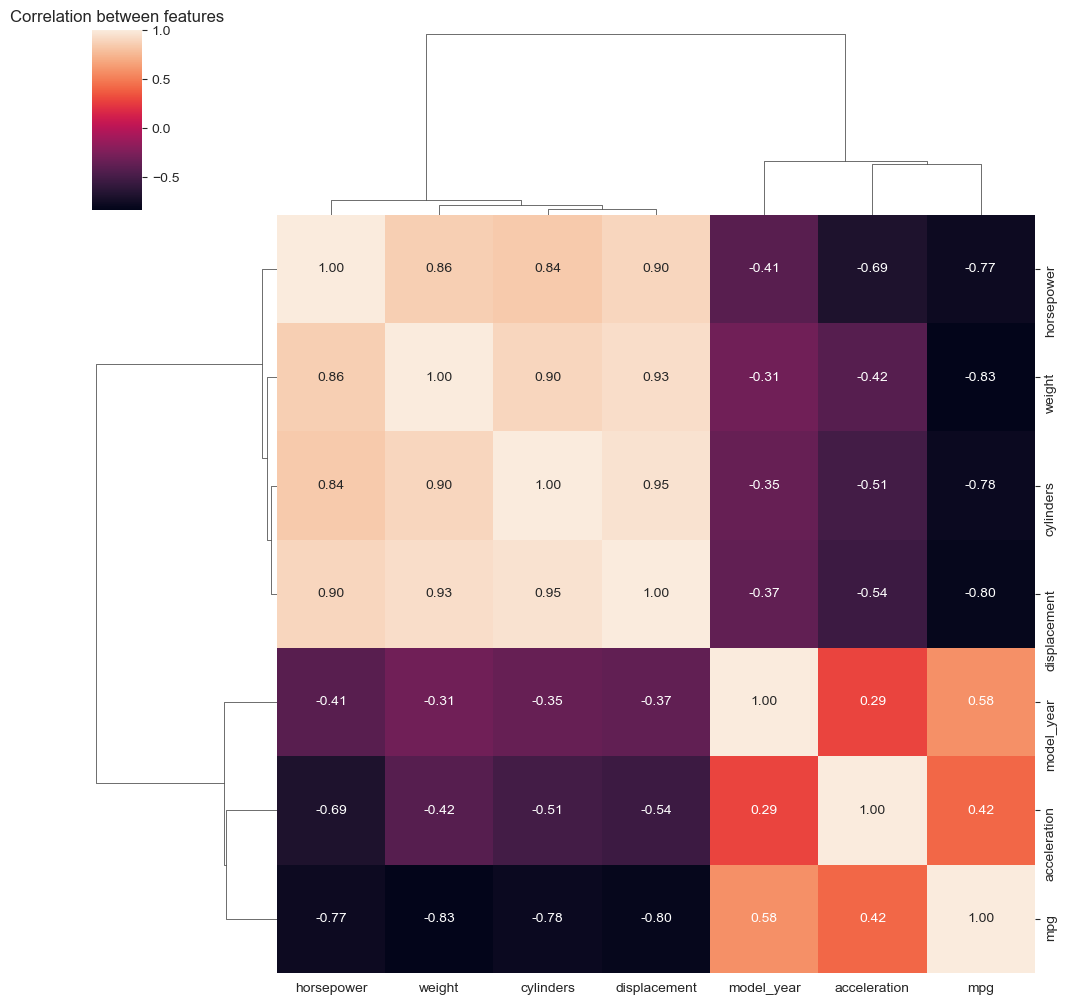

In [85]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True,  fmt= ".2f")
plt.title("Correlation between features")
plt.show()

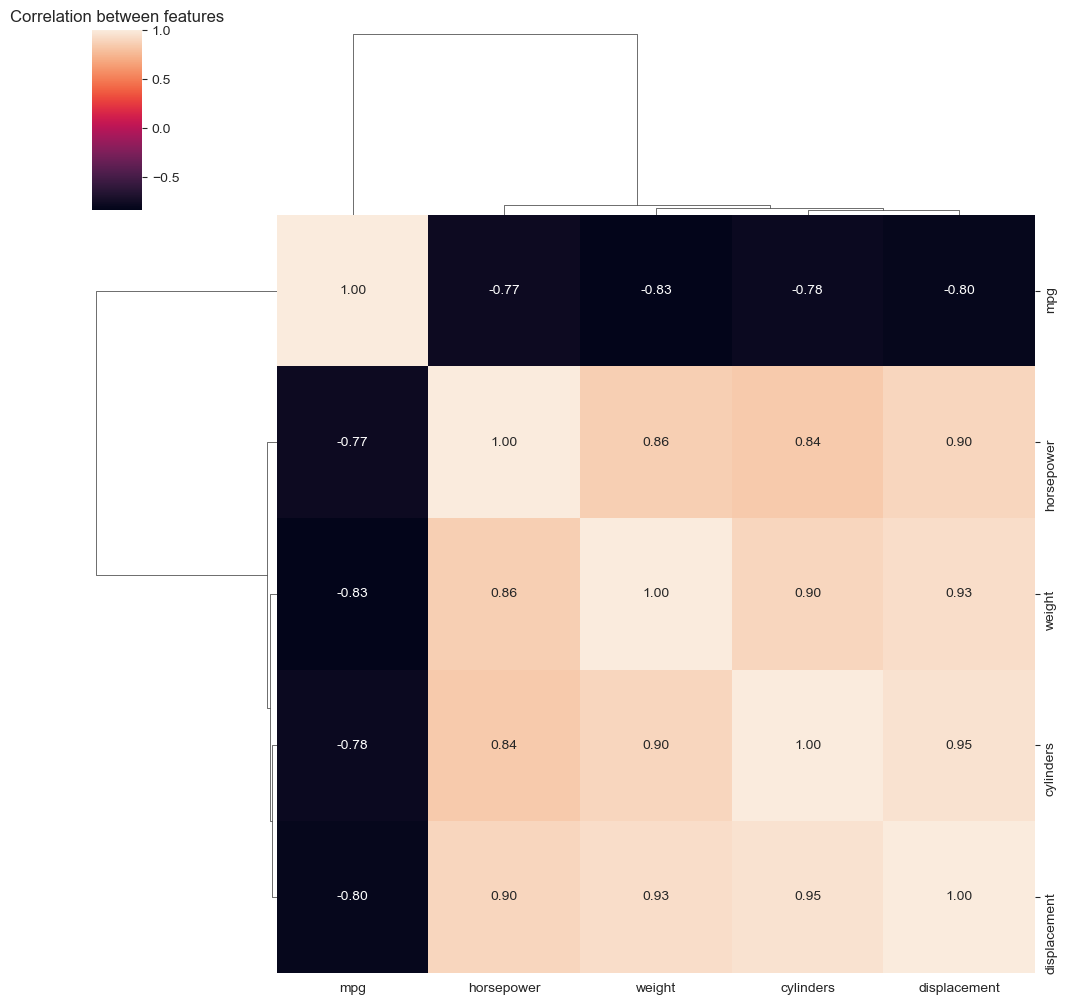

In [86]:
threshold = 0.75
filtre = np.abs(corr_matrix["mpg"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True,  fmt= ".2f")
plt.title("Correlation between features")
plt.show()

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   mpg           398 non-null    float64
 8   brand         398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


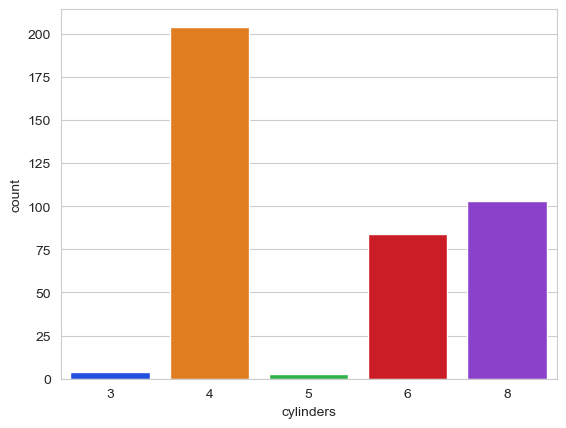

In [88]:
plt.figure()
sns.countplot(data["cylinders"])
print(data["cylinders"].value_counts())

USA       249
Japan      79
Europe     70
Name: origin, dtype: int64


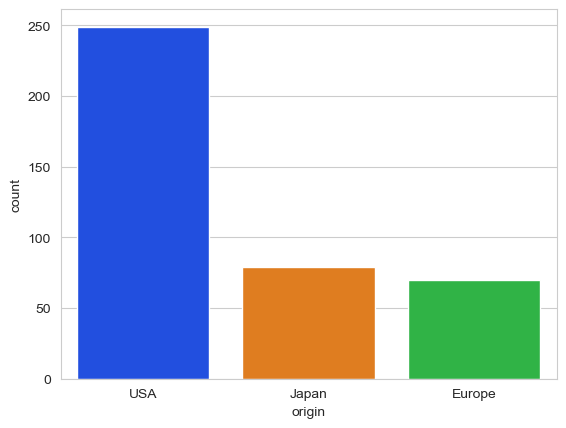

In [89]:
plt.figure()
sns.countplot(data["origin"])
print(data["origin"].value_counts())

In [90]:
data.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

  origin   mpg      brand  
0    USA  18.0  Chevrolet  
1    USA  15.0      Buick  
2    USA  18.0   Plymouth  
3    USA  16.0        Amc  
4    USA  17.0       Ford

In [91]:
y=data.iloc[:,7].values
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [92]:
x=data.drop("mpg",axis=1).values

In [93]:
x[:10]

array([[8, 307.0, 130.0, 3504.0, 12.0, 70, 'USA', 'Chevrolet'],
       [8, 350.0, 165.0, 3693.0, 11.5, 70, 'USA', 'Buick'],
       [8, 318.0, 150.0, 3436.0, 11.0, 70, 'USA', 'Plymouth'],
       [8, 304.0, 150.0, 3433.0, 12.0, 70, 'USA', 'Amc'],
       [8, 302.0, 140.0, 3449.0, 10.5, 70, 'USA', 'Ford'],
       [8, 429.0, 198.0, 4341.0, 10.0, 70, 'USA', 'Ford'],
       [8, 454.0, 220.0, 4354.0, 9.0, 70, 'USA', 'Chevrolet'],
       [8, 440.0, 215.0, 4312.0, 8.5, 70, 'USA', 'Plymouth'],
       [8, 455.0, 225.0, 4425.0, 10.0, 70, 'USA', 'Pontiac'],
       [8, 390.0, 190.0, 3850.0, 8.5, 70, 'USA', 'Amc']], dtype=object)

In [94]:
y[:10]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.])

In [95]:
x.shape

(398, 8)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   mpg           398 non-null    float64
 8   brand         398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


In [97]:
data.reset_index(drop=True)

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     origin   mpg      brand  
0       USA  18.0  Chevrolet  
1       USA  15.0      Buick  
2       USA  18.0   Plymouth  
3       USA  16.0        Amc  
4       USA  17.0       Ford  
..      ...   ...        ...  
393     USA  27.0       Ford  
394  Europe  44.0         Vw  
395     USA  32.0      Dodge  
396     USA  28.0       Ford  
397     USA  31.0  Chevrolet  

[398 rows x 9 columns]

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [99]:
ohe = OneHotEncoder()

In [100]:
X = pd.DataFrame(data=data,index=range(398),columns=['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','brand'])
X

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     origin      brand  
0       USA  Chevrolet  
1       USA      Buick  
2       USA   Plymouth  
3       USA        Amc  
4       USA       Ford  
..      ...        ...  
393     USA       Ford  
394  Europe         Vw  
395     USA      Dodge  
396     USA       Ford  
397     USA  Chevrolet  

[398 rows x 8 columns]

In [101]:
X['displacement'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [102]:
X['displacement'] = X['displacement'].astype(int)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    int32  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   brand         398 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 23.4+ KB


In [104]:
X['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        83., 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [105]:
X['horsepower'] = X['horsepower'].astype(int)
X['weight'] = X['weight'].astype(int)
X['acceleration'] = X['acceleration'].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cylinders     398 non-null    int64 
 1   displacement  398 non-null    int32 
 2   horsepower    398 non-null    int32 
 3   weight        398 non-null    int32 
 4   acceleration  398 non-null    int32 
 5   model_year    398 non-null    int64 
 6   origin        398 non-null    object
 7   brand         398 non-null    object
dtypes: int32(4), int64(2), object(2)
memory usage: 18.8+ KB


In [106]:
y = pd.DataFrame(data=y,index=range(398),columns=['target'])

In [107]:
data = pd.concat([X,y],axis=1)
data

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8           307         130    3504            12          70   
1            8           350         165    3693            11          70   
2            8           318         150    3436            11          70   
3            8           304         150    3433            12          70   
4            8           302         140    3449            10          70   
..         ...           ...         ...     ...           ...         ...   
393          4           140          86    2790            15          82   
394          4            97          52    2130            24          82   
395          4           135          84    2295            11          82   
396          4           120          79    2625            18          82   
397          4           119          82    2720            19          82   

     origin      brand  target  
0       USA  Chevrolet    18.0  
1       USA      Buick    15.0  
2       USA   Plymouth    18.0  
3       USA        Amc    16.0  
4       USA       Ford    17.0  
..      ...        ...     ...  
393     USA       Ford    27.0  
394  Europe         Vw    44.0  
395     USA      Dodge    32.0  
396     USA       Ford    28.0  
397     USA  Chevrolet    31.0  

[398 rows x 9 columns]

In [109]:
data.to_csv("new_data.csv")

In [110]:
ohe = OneHotEncoder()
ohe.fit(X[['origin','brand']])

OneHotEncoder()

In [111]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[29]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 97.0, 88.0, 2130.0, 14.5,
       71, 'Datsun'], dtype=object)

In [112]:
ohe.categories_

[array(['Europe', 'Japan', 'USA'], dtype=object),
 array(['Amc', 'Audi', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
        'Datsun', 'Dodge', 'Fiat', 'Ford', 'Hi', 'Honda', 'Mazda',
        'Mercedes-benz', 'Mercury', 'Oldsmobile', 'Opel', 'Peugeot',
        'Plymouth', 'Pontiac', 'Renault', 'Saab', 'Subaru', 'Toyota',
        'Triumph', 'Volvo', 'Vw'], dtype=object)]

In [113]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_,sparse=False,drop='first'),
                                        ['origin','brand']),remainder="passthrough")

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
lr = LinearRegression()

In [116]:
pipe = make_pipeline(column_trans,lr)

In [117]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Europe', 'Japan', 'USA'], dtype=object),
                                                                            array(['Amc', 'Audi', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Datsun', 'Dodge', 'Fiat', 'Ford', 'Hi', 'Honda', 'Mazda',
       'Mercedes-benz', 'Mercury', 'Oldsmobile', 'Opel', 'Peugeot',
       'Plymouth', 'Pontiac', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Triumph', 'Volvo', 'Vw'], dtype=object)],
                                                                drop='first',
                                                                sparse=False),
                                                  ['origin', 'brand'])])),
                ('linearregression', LinearRegression())])

In [118]:
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

0.8199200103639953


In [119]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linreg=mean_squared_error(y_test,y_pred)

print(np.sqrt(mse_linreg))

3.1116331135377817


In [120]:
scores = []
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [121]:
np.argmax(scores)

27

In [122]:
scores[np.argmax(scores)]

0.8955358641427739

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8578596367971537

In [124]:
print("X_train shape",X_train.shape)
print("Y_train shape",y_train.shape)

X_train shape (298, 8)
Y_train shape (298, 1)


In [125]:
import statsmodels.api as sm
nobs = 298

X = np.random.random((nobs, 8))
X = sm.add_constant(X)
beta = np.random.randint(0,10,9)
e = np.random.random(nobs)
y = np.dot(X, beta) + e
results = sm.OLS(y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8228.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:04:27   Log-Likelihood:                -48.735
No. Observations:                 298   AIC:                             115.5
Df Residuals:                     289   BIC:                             148.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4971      0.089    107.017      0.0

In [126]:
MultiLinearRegression = r2_score(y_test,y_pred)
MultiLinearRegression

0.8578596367971537

In [128]:
import pickle 

In [129]:
filname = 'new_predict.pkl'
pickle.dump(pipe,open(filname,'wb'))

In [130]:
data.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8           307         130    3504            12          70   
1          8           350         165    3693            11          70   
2          8           318         150    3436            11          70   
3          8           304         150    3433            12          70   
4          8           302         140    3449            10          70   

  origin      brand  target  
0    USA  Chevrolet    18.0  
1    USA      Buick    15.0  
2    USA   Plymouth    18.0  
3    USA        Amc    16.0  
4    USA       Ford    17.0

In [131]:
pipe.predict(pd.DataFrame([[8,307,130,3500,12,70,'USA','Chevrolet']],columns=['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','brand']))

array([[14.73820506]])